In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns; sns.set()
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import *
import time

%matplotlib inline

In [6]:
#This loop only using all the possible data
df = pd.read_csv('final_data.csv')

In [7]:
df['sex'].unique()

array(['MALE', 'FEMALE', 'missing'], dtype=object)

In [8]:
df["booking_date"].max()

'2016-04-30 00:00:00'

In [9]:
df.shape

(24855, 27)

In [10]:
acs =pd.read_csv('fips_acs.csv')

In [11]:
acs.columns

Index(['fips', 'per_capita_income', 'poverty_stat', 'household_income',
       'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18',
       'SSI_income', 'grandparent_care', 'military_service', 'education_25',
       'property_value_occupied', 'retirement_income', 'rent_over_income',
       'zip'],
      dtype='object')

In [12]:
df.zip.nunique()

1208

In [13]:
acs.zip.nunique()

244

In [14]:
df=df.dropna(subset=['zip'])

In [15]:
df = acs.merge(df, how="inner")

In [16]:
df.shape

(22923, 41)

In [17]:
df.columns

Index(['fips', 'per_capita_income', 'poverty_stat', 'household_income',
       'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18',
       'SSI_income', 'grandparent_care', 'military_service', 'education_25',
       'property_value_occupied', 'retirement_income', 'rent_over_income',
       'zip', 'mni_no', 'dedupe_id', 'dob', 'sex', 'race', 'mar_stat', 'city',
       'state', 'case_no', 'case_type', 'booking_no', 'arresting_agency',
       'arresting_agency_type', 'booking_date', 'release_date', 'bail_type',
       'bail_amt', 'bailed_out', 'pri_dx_value', 'refferal_source',
       'mh_treatment', 're_entry', 'age', 'after_released', 'within_one',
       'within_two'],
      dtype='object')

In [18]:
#Check the prob of re-entry within one year
df['within_one'].sum()/df.shape[0]

0.2261047855865288

In [19]:
#Check the prob of re-entry within two year
df['within_two'].sum()/df.shape[0]

0.281158661606247

In [20]:
df = df.drop(['re_entry', 'age', 'mni_no', 'dedupe_id', 'dob', 'state', 'city', 'fips', 'zip', 'release_date', 'case_no', 'booking_no', 'pri_dx_value',
       'refferal_source'], axis=1)

In [21]:
df.columns

Index(['per_capita_income', 'poverty_stat', 'household_income',
       'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18',
       'SSI_income', 'grandparent_care', 'military_service', 'education_25',
       'property_value_occupied', 'retirement_income', 'rent_over_income',
       'sex', 'race', 'mar_stat', 'case_type', 'arresting_agency',
       'arresting_agency_type', 'booking_date', 'bail_type', 'bail_amt',
       'bailed_out', 'mh_treatment', 'after_released', 'within_one',
       'within_two'],
      dtype='object')

In [22]:
df.head()

per_capita_income  poverty_stat  household_income  mortgage_stat  \
0            26836.0          1118               456            364   
1            26836.0          1118               456            364   
2            26836.0          1118               456            364   
3            26836.0          1118               456            364   
4            26836.0          1118               456            364   

   school_enrollment_16-19  own_children_under18  SSI_income  \
0                      167                   175         456   
1                      167                   175         456   
2                      167                   175         456   
3                      167                   175         456   
4                      167                   175         456   

   grandparent_care  military_service  education_25    ...      \
0               692                66           776    ...       
1               692                66           776    ...       
2               692                66           776    ...       
3               692                66           776    ...       
4               692                66           776    ...       

                      arresting_agency  arresting_agency_type  \
0  JOHNSON COUNTY SHERIFF'S DEPARTMENT         COUNTY SHERIFF   
1  JOHNSON COUNTY SHERIFF'S DEPARTMENT         COUNTY SHERIFF   
2                   OVERLAND PARK P.D.                   CITY   
3  JOHNSON COUNTY SHERIFF'S DEPARTMENT         COUNTY SHERIFF   
4  JOHNSON COUNTY SHERIFF'S DEPARTMENT         COUNTY SHERIFF   

          booking_date bail_type bail_amt bailed_out mh_treatment  \
0  2013-12-30 00:00:00       SUR   1500.0          1            0   
1  2013-11-10 00:00:00       SUR  15000.0          1            1   
2  2012-10-10 00:00:00       SUR  20000.0          1            1   
3  2011-05-26 00:00:00       SUR   5000.0          1            1   
4  2011-06-27 00:00:00       SUR   5000.0          1            1   

  after_released within_one within_two  
0          586.0          0          1  
1          603.0          0          1  
2          -41.0          1          1  
3            7.0          1          1  
4           32.0          1          1  

[5 rows x 27 columns]

In [23]:
dummy_vals = ['sex', 'race','mar_stat', 'case_type', 'arresting_agency', 'arresting_agency_type', 'bail_type' ]

In [24]:
#generate dummy variable for specific column
def getting_dummy(df, col):
    '''
    Helper function to create dummy variables in dataframe for specific column
    This function will return dataframe
    '''
    dummies = pd.get_dummies(df[col]).rename(columns=lambda x: str(col)+ str(x))
    df = pd.concat([df, dummies], axis=1)
    df.drop([col], inplace=True, axis=1)
    return df

In [25]:
for dummy in dummy_vals:
    df = getting_dummy(df, dummy)

In [26]:
#4 GenerateFeatures/Predictors: discretize a continuous variable 
def discrete_val(df, cols, bins=4):
    '''
    Helper function to discrete the continueous variable in dataframe into 4 bins
    This function will return dictionary mapping column name to the bin values
    '''
    for col in cols:
        new = col+'_binned'
        df[new] = pd.cut(df[col], bins, include_lowest=True, labels = range(0,bins))
        df.drop([col], inplace=True, axis=1)
    return df

In [27]:
binv = ['per_capita_income', 'poverty_stat', 'household_income',
       'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18',
       'SSI_income', 'grandparent_care', 'military_service', 'education_25',
       'property_value_occupied', 'retirement_income', 'rent_over_income','bail_amt']
df = discrete_val(df, binv, 6)

In [28]:
dum = [ 'per_capita_income_binned',
 'poverty_stat_binned',
 'household_income_binned',
 'mortgage_stat_binned',
 'school_enrollment_16-19_binned',
 'own_children_under18_binned',
 'SSI_income_binned',
 'grandparent_care_binned',
 'military_service_binned',
 'education_25_binned',
 'property_value_occupied_binned',
 'retirement_income_binned',
 'rent_over_income_binned',
 'bail_amt_binned']

In [29]:
for dummy in dum:
    df = getting_dummy(df, dummy)

In [30]:
indepv = list(df.columns)

In [31]:
indepv.remove('after_released')

In [32]:
indepv.remove('within_one')

In [33]:
indepv.remove('within_two')

In [34]:
indepv

['booking_date',
 'bailed_out',
 'mh_treatment',
 'sexFEMALE',
 'sexMALE',
 'sexmissing',
 'raceAMERICAN INDIAN OR ALASKA NATIVE',
 'raceASIAN',
 'raceBLACK OR AFRICAN AMERICAN',
 'raceWHITE',
 'mar_statA',
 'mar_statD',
 'mar_statM',
 'mar_statN',
 'mar_statS',
 'mar_statU',
 'mar_statW',
 'mar_statY',
 'mar_statmissing',
 'case_typeCR',
 'case_typeDV',
 'case_typeJV',
 'arresting_agencyFAIRWAY P.D.',
 'arresting_agencyGARDNER P.D.',
 'arresting_agencyJOHNSON COUNTY PARK PATROL',
 "arresting_agencyJOHNSON COUNTY SHERIFF'S DEPARTMENT",
 'arresting_agencyKANSAS HIGHWAY PATROL',
 'arresting_agencyLAKE QUIVIRA P.D.',
 'arresting_agencyLEAWOOD P.D.',
 'arresting_agencyLENEXA P.D.',
 'arresting_agencyMERRIAM P.D.',
 'arresting_agencyMISSION P.D.',
 'arresting_agencyOLATHE P.D.',
 'arresting_agencyOTHER AGENCY',
 'arresting_agencyOVERLAND PARK P.D.',
 'arresting_agencyPRAIRIE VILLAGE P.D.',
 'arresting_agencyROELAND PARK P.D.',
 'arresting_agencySHAWNEE MISSION SCHOOL SECURITY',
 'arresting_

In [35]:
def temporal_split(df, time_col, start_time, mid_time, end_time):
    train = df[(df[time_col] >= start_time) & (df[time_col] < mid_time) ]
    test = df[(df[time_col] >= mid_time)  & (df[time_col] < end_time)]
    train = train.drop([time_col], axis=1)
    test = test.drop([time_col], axis=1)
    return train, test

In [36]:
indepv.remove('booking_date')

In [37]:
def split_data(train, test, y):
    '''
    Split the data into training and testing set
    
    And save them to run try different models
    '''
    x_test = test[indepv] 
    x_train = train[indepv]
    y_test = test[y]
    y_train = train[y]
    
    return x_train, x_test, y_train, y_test

In [38]:
train, test = temporal_split(df, 'booking_date', '2010-01-01', '2015-07-01', '2018-01-01' )

In [39]:
train.shape

(19516, 138)

In [40]:
test.shape

(3407, 138)

In [41]:
clfs = {'RF': RandomForestClassifier(),
    'Boost': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)),
    'Logit': LogisticRegression(),
    'SVM': SVC(probability=True, random_state=0),
    'Tree': DecisionTreeClassifier(),
    'Bag': BaggingClassifier(),
    'KNN': KNeighborsClassifier(),
    'ET': ExtraTreesClassifier(n_estimators=10, n_jobs=-1, criterion='entropy'),
    'NB': GaussianNB()}

small_grid = {'RF':{'n_estimators': [10,100], 'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10]},
    'Boost': {'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1,10,100,1000]},
    'Logit': {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10]},
    'SVM' :{'C' :[0.01,0.1,1,10],'kernel':['linear']},
    'Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [5,10,20,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5]},
    'Bag':{'n_estimators':[1,10,20,50], 'max_samples':[5,10], 'max_features': [5,10]},
    'KNN' :{'n_neighbors': [1,10,50],'weights': ['uniform','distance'],'algorithm': ['auto']},
    'ET': {'n_estimators': [10,100], 'criterion' : ['gini', 'entropy'] ,'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10], 'n_jobs': [-1]},
    'NB' : {}}

In [42]:
def generate_binary_at_k(y_scores, k):
    '''
    Set first k% as 1, the rest as 0.
    '''
    cutoff_index = int(len(y_scores) * (k / 100.0))
    test_predictions_binary = [1 if x < cutoff_index else 0 for x in range(len(y_scores))]
    return test_predictions_binary

In [43]:
def scores_at_k(y_true, y_scores, k):
    '''
    For a given level of k, calculate corresponding
    precision, recall, and f1 scores.
    '''
    preds_at_k = generate_binary_at_k(y_scores, k)
    precision = round(precision_score(y_true, preds_at_k),4)
    recall = round(recall_score(y_true, preds_at_k), 4)
    f1 = round(f1_score(y_true, preds_at_k),4)
    return precision, recall, f1

In [44]:
def plot(y_test, y_pred_probs, model, para = None):

    precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve for {} model: AUC={:.2f} \n with parameters: {}'.\
                        format(model, average_precision_score(y_test, y_pred_probs), para))
    plt.show()

In [45]:
def clf_loop(models, x_train, x_test, y_train, y_test, grid=small_grid):
    '''
    Run model with given params on x and y
    and print out the scores for comparison
    '''
    results_df = pd.DataFrame(columns=('model_type', 'parameters', 'auc-roc', 'precision', 'time', 'precision,recall,f1 at_5',
     'precision,recall,f1 at_10', 'precision,recall,f1 at_20', 'precision,recall,f1 at_30', 'precision,recall,f1 at_50'))
    for index, clf in enumerate([clfs[x] for x in models]):
        model_params = grid[models[index]]
        for p in ParameterGrid(model_params):
            try:
                start = time.time()
                clf.set_params(**p)
                y_pred_probs = clf.fit(x_train, y_train).predict_proba(x_test)[:,1]
                accuracy = clf.score(x_test, y_test)
                end = time.time()
                #Zip, unzip to ensure corresponding order
                y_pred_probs_sorted, y_test_sorted = zip(*sorted(zip(y_pred_probs, y_test), reverse=True))

                results_df.loc[len(results_df)] = [models[index], p,
                                             round(roc_auc_score(y_test, y_pred_probs),4),
                                             round(average_precision_score(y_test, y_pred_probs),4),
                                             round(end-start, 4) ,                                                    
                                             scores_at_k(y_test_sorted,y_pred_probs_sorted,5.0),
                                             scores_at_k(y_test_sorted,y_pred_probs_sorted,10.0),
                                             scores_at_k(y_test_sorted,y_pred_probs_sorted,20.0),
                                             scores_at_k(y_test_sorted,y_pred_probs_sorted,30.0),
                                             scores_at_k(y_test_sorted,y_pred_probs_sorted,50.0)]

                plot(y_test, y_pred_probs, models[index],p)
                
            except IndexError as e:
                print(e)
                continue
    return results_df

In [46]:
#Running classifiers to predict if the person re-enter within one years
x_train, x_test, y_train, y_test = split_data(train, test, 'within_one')

In [47]:
x_train, x_test, y_train2, y_test2 = split_data(train, test, 'within_two')

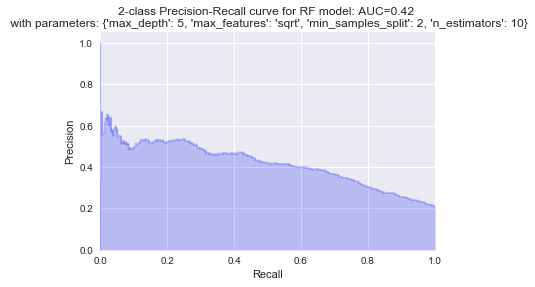

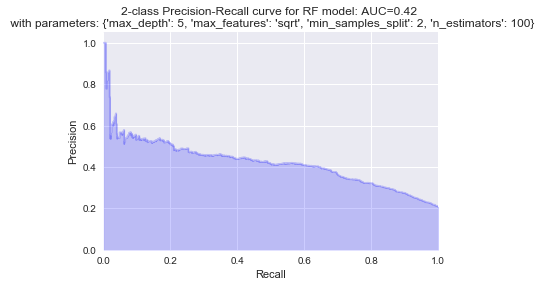

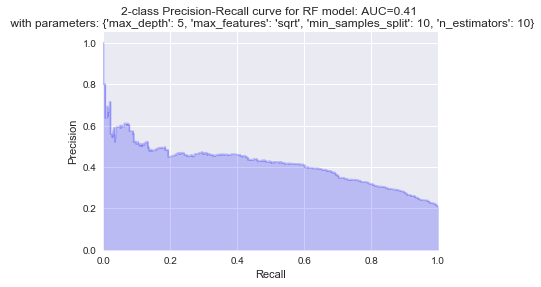

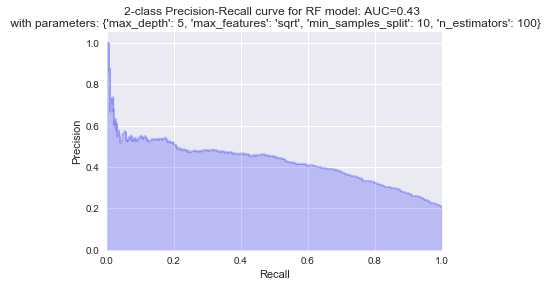

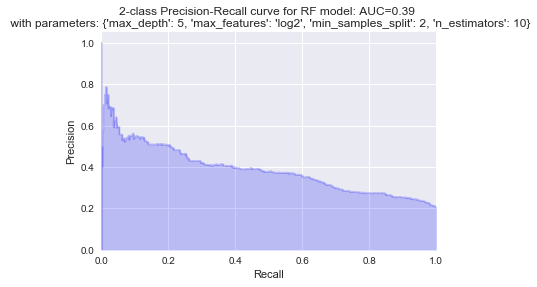

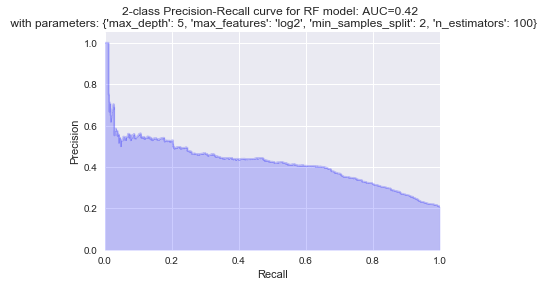

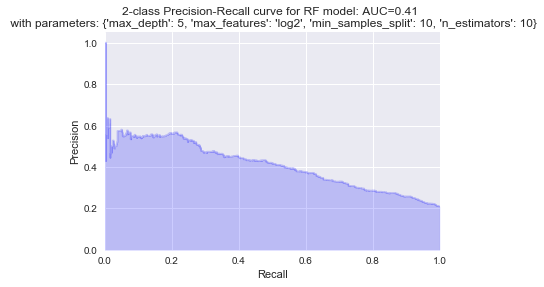

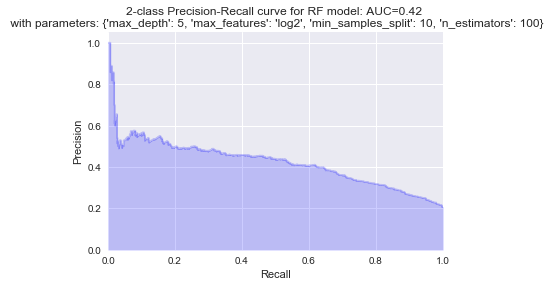

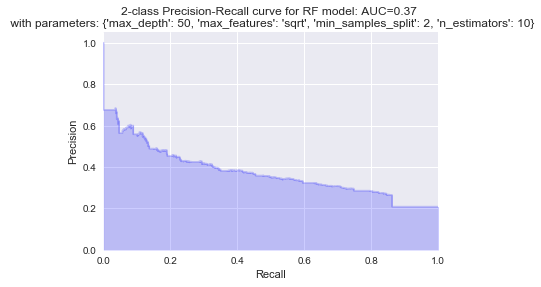

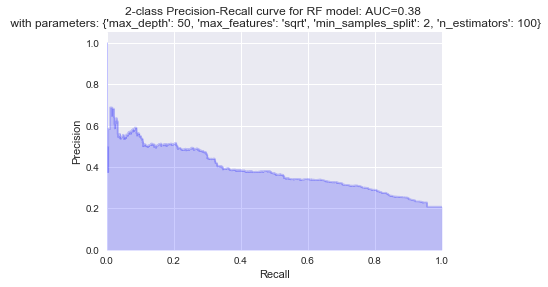

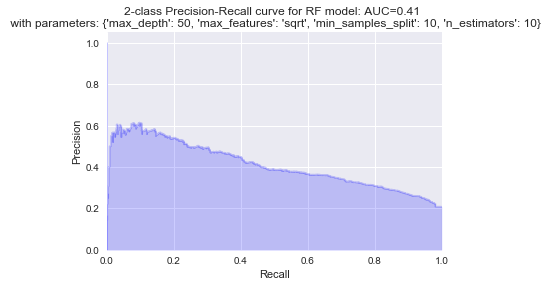

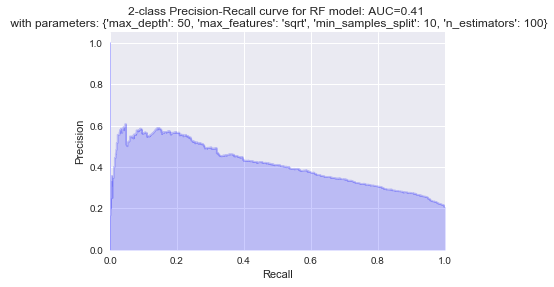

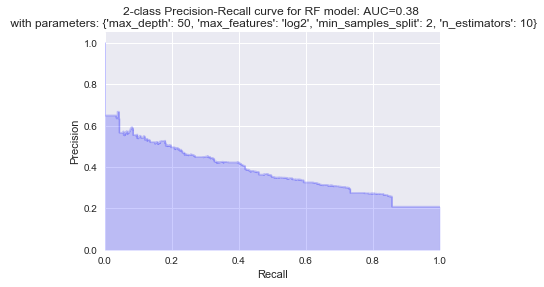

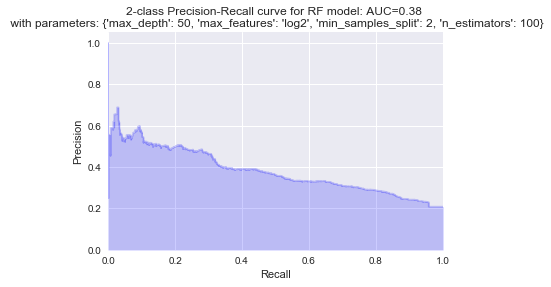

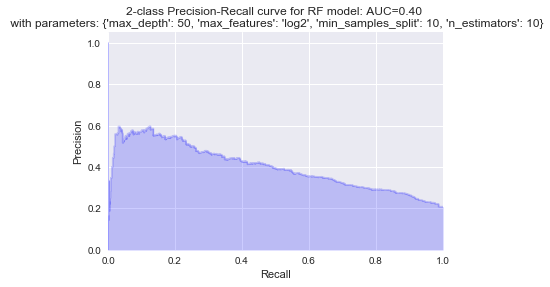

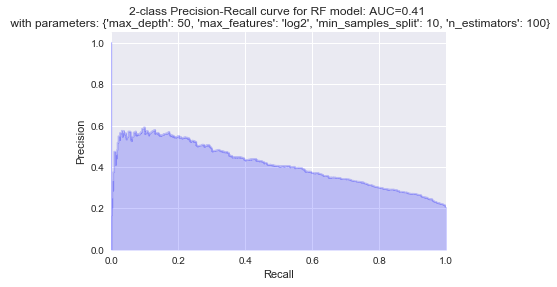

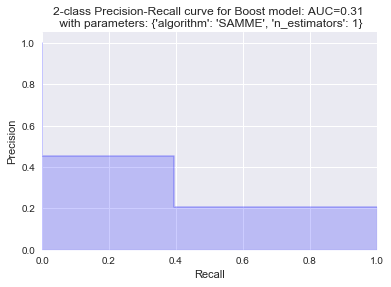

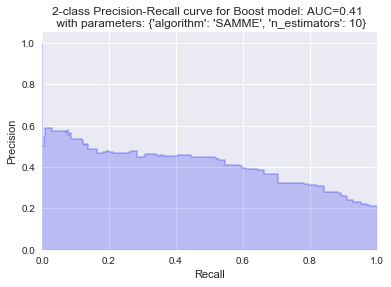

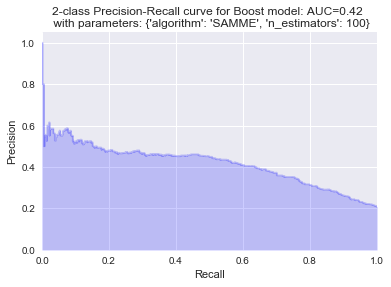

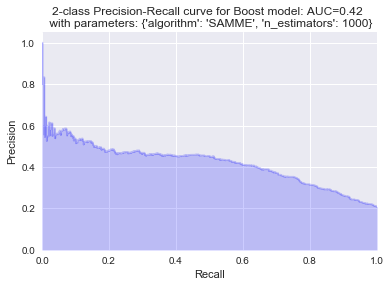

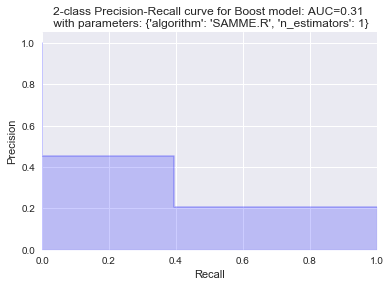

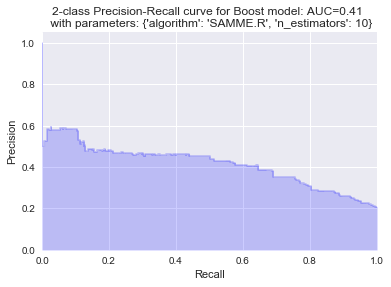

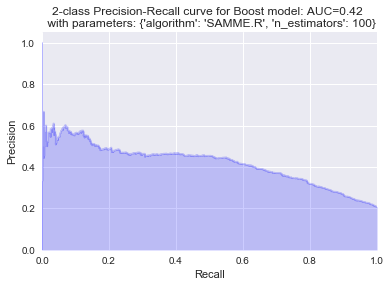

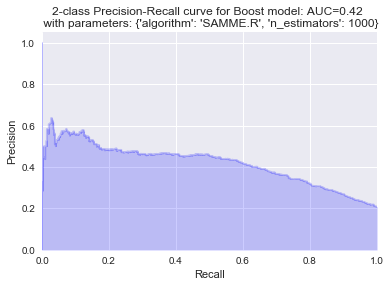

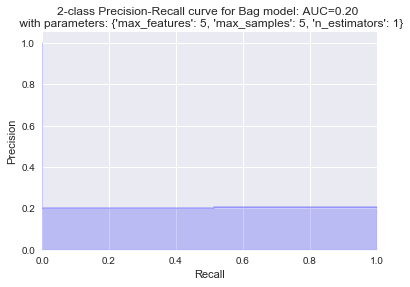

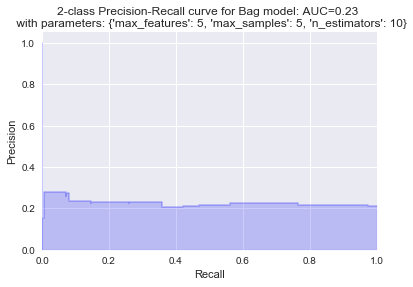

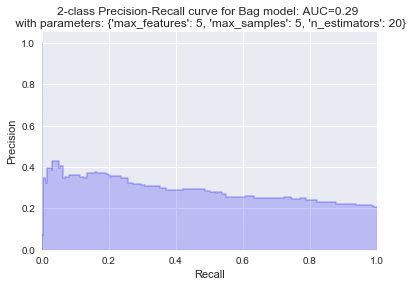

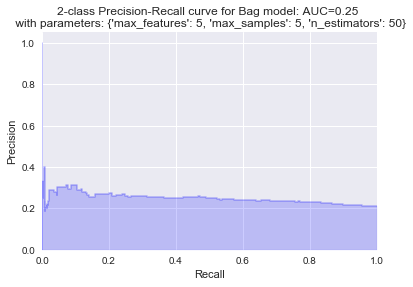

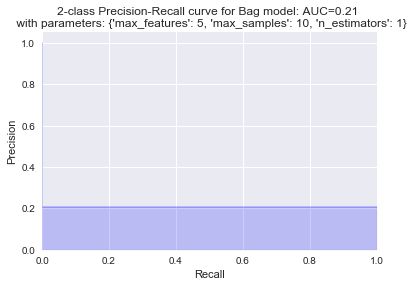

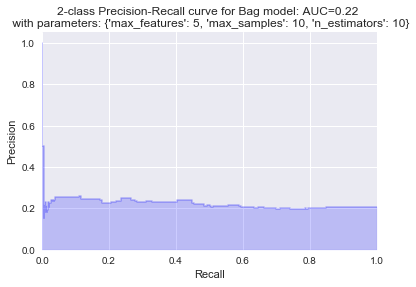

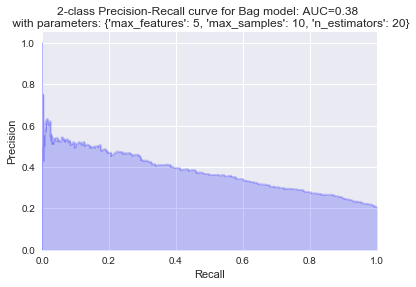

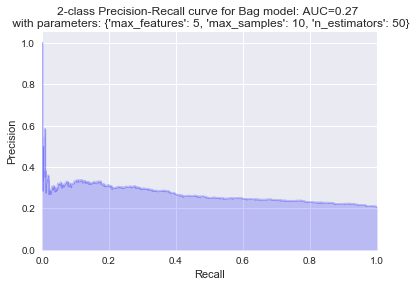

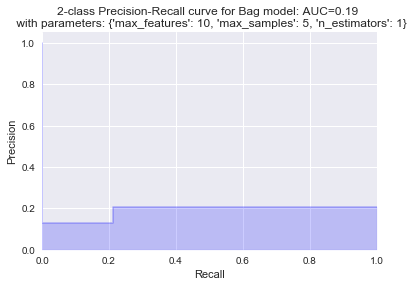

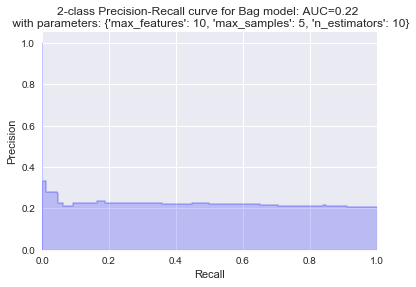

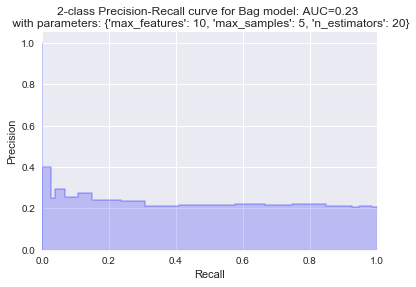

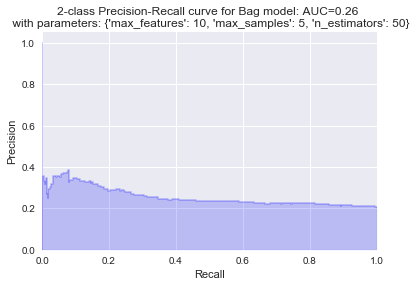

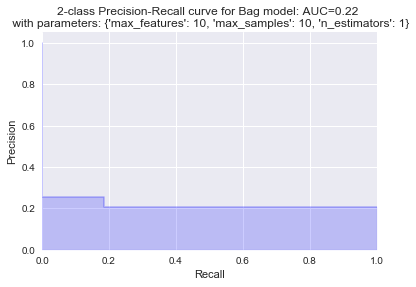

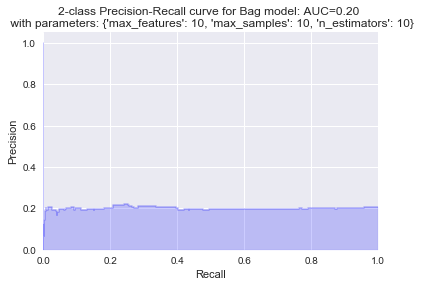

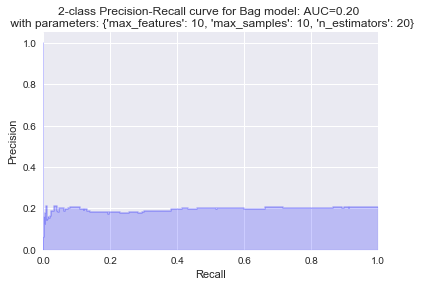

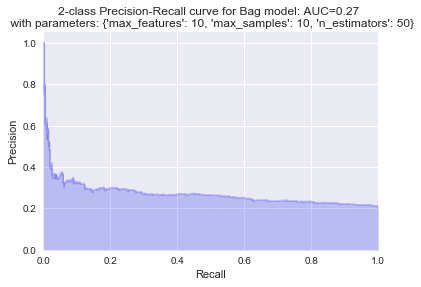

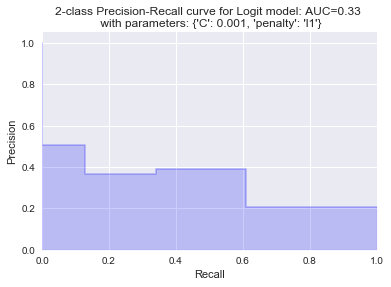

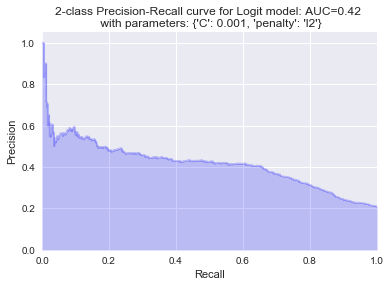

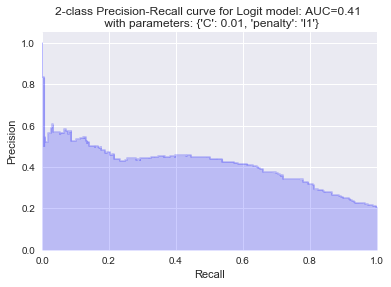

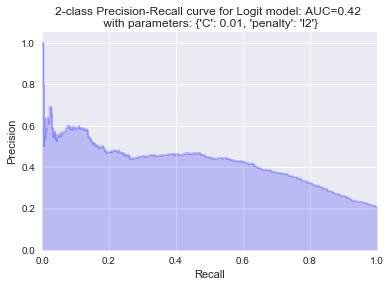

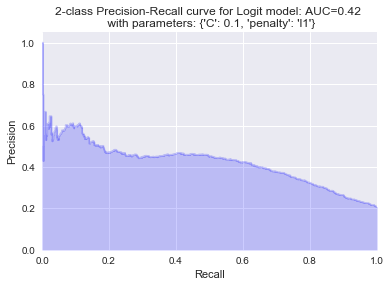

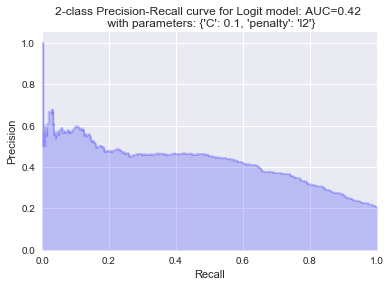

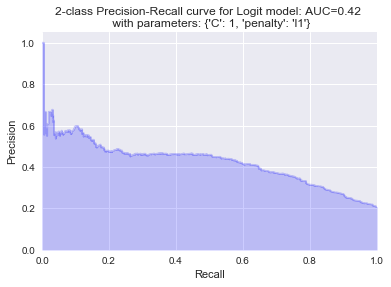

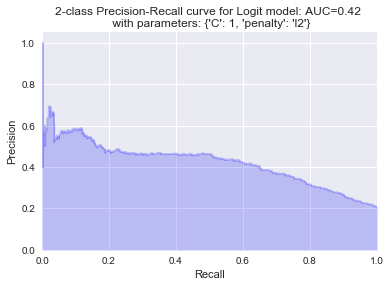

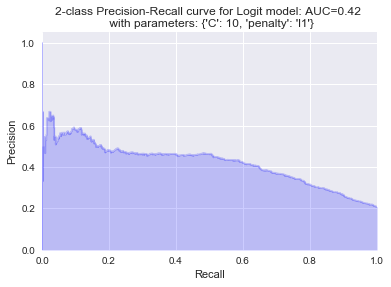

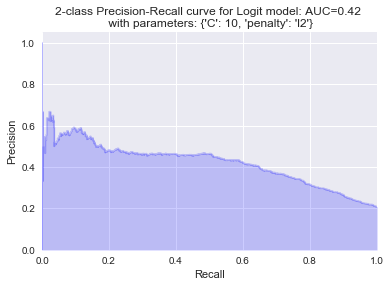

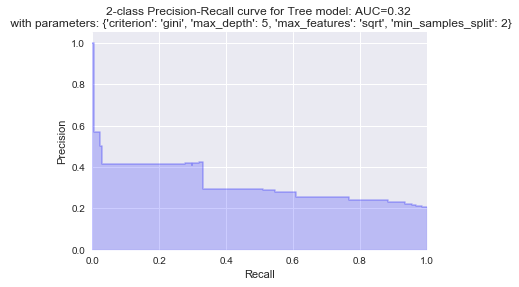

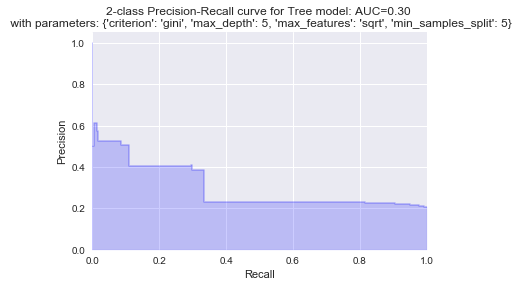

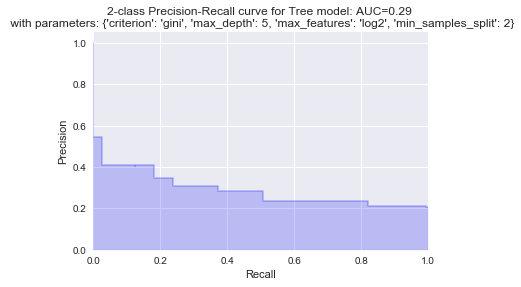

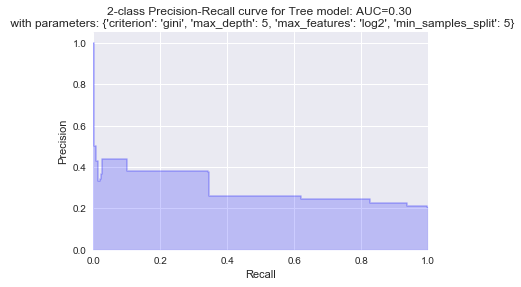

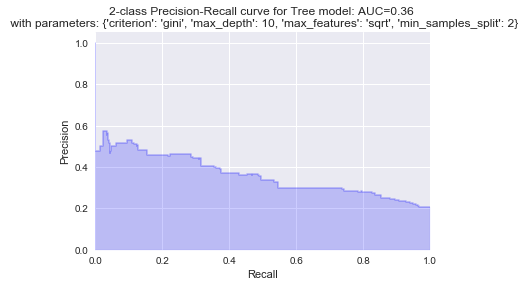

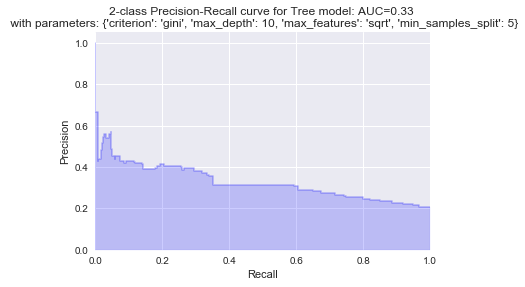

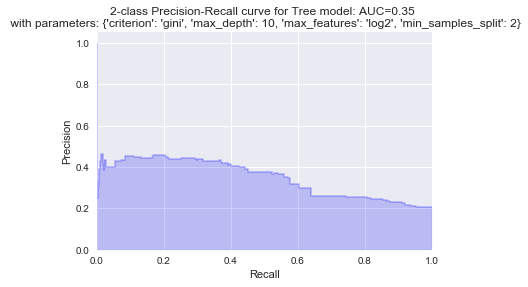

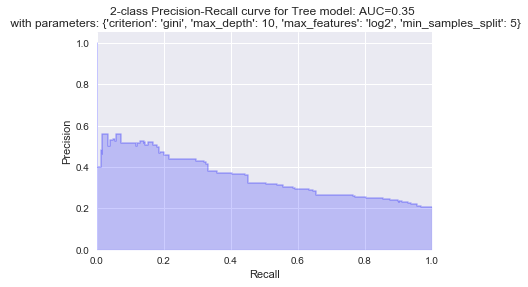

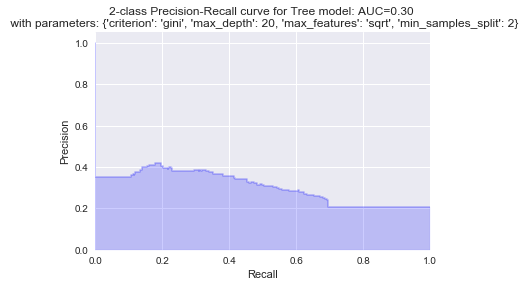

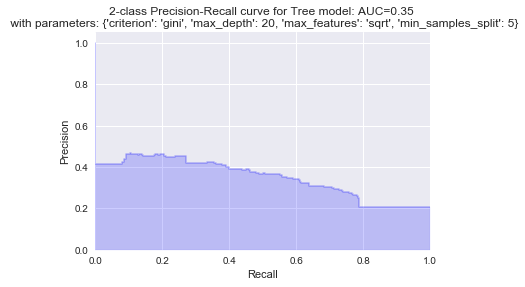

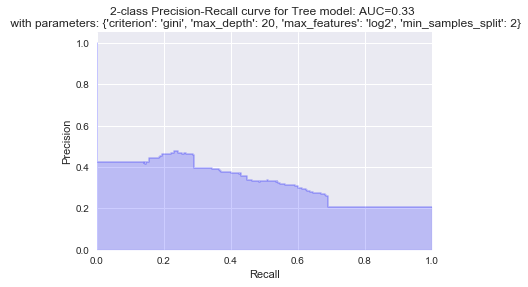

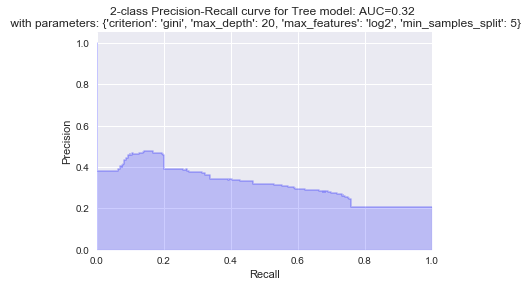

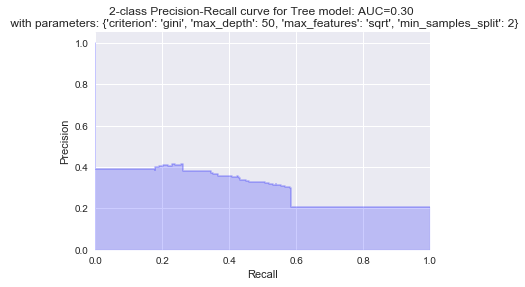

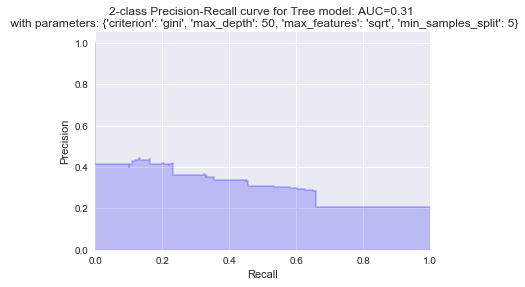

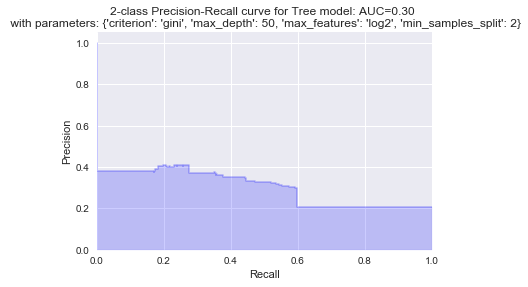

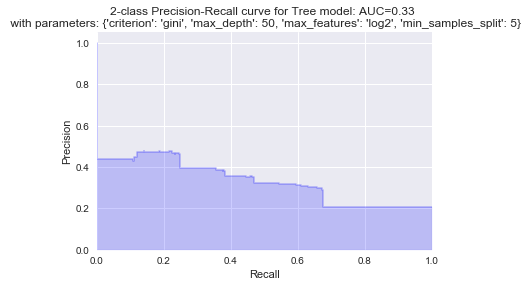

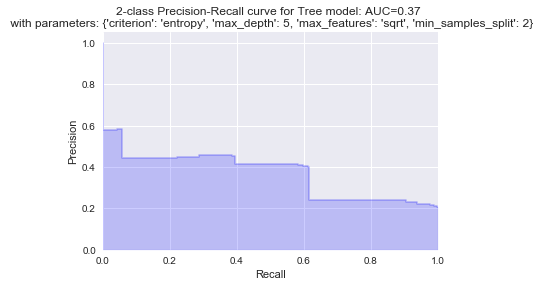

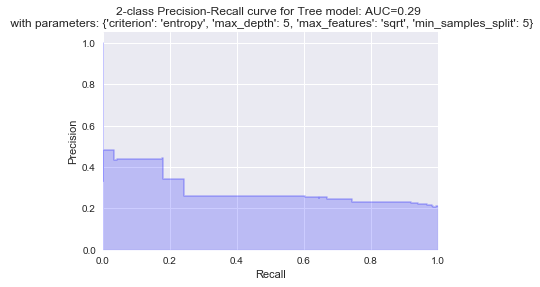

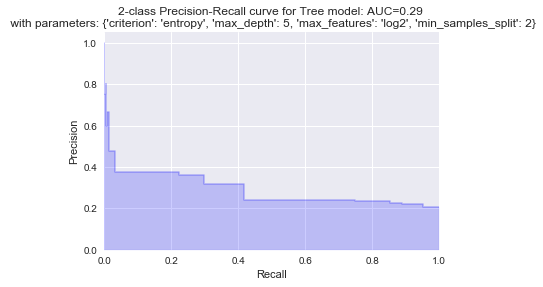

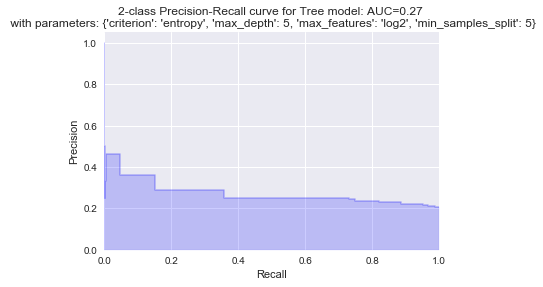

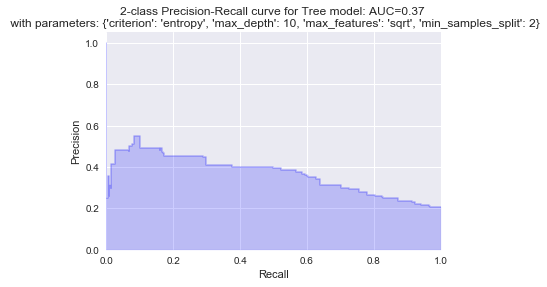

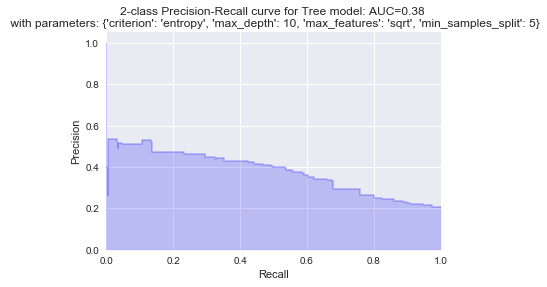

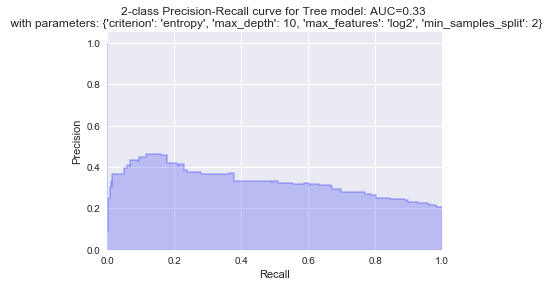

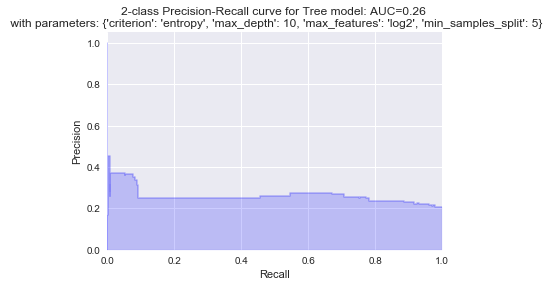

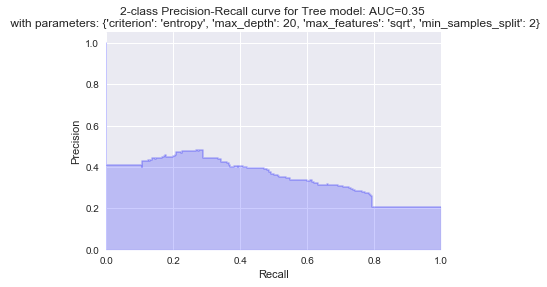

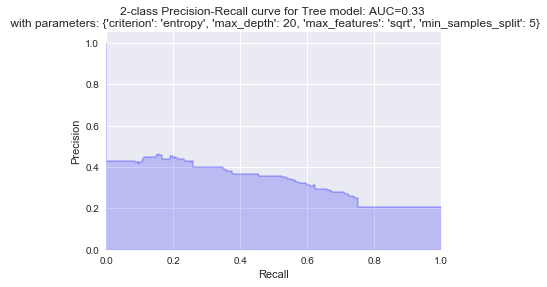

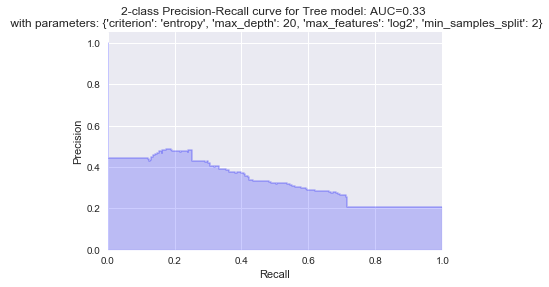

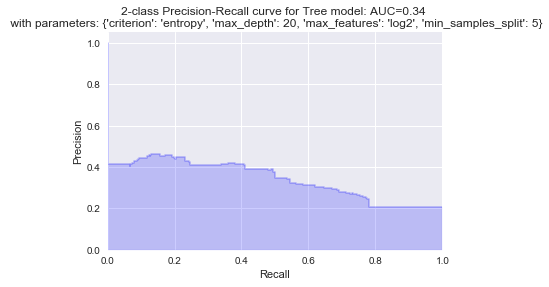

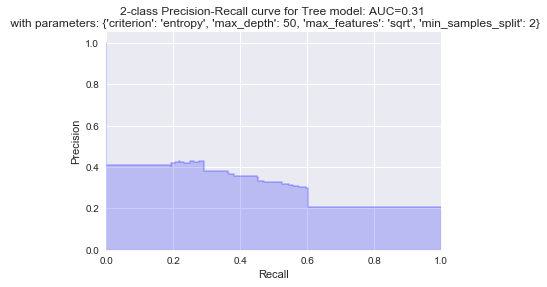

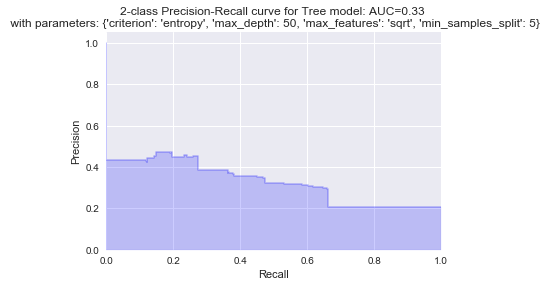

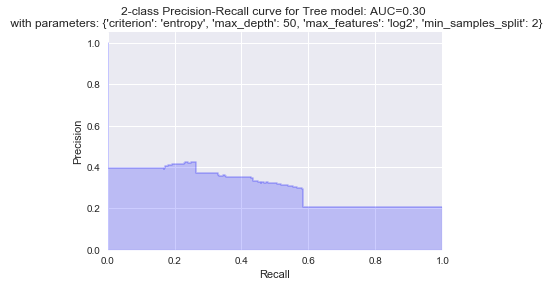

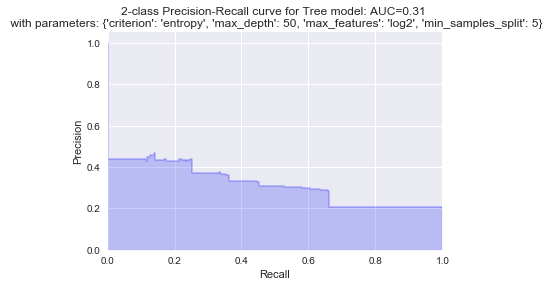

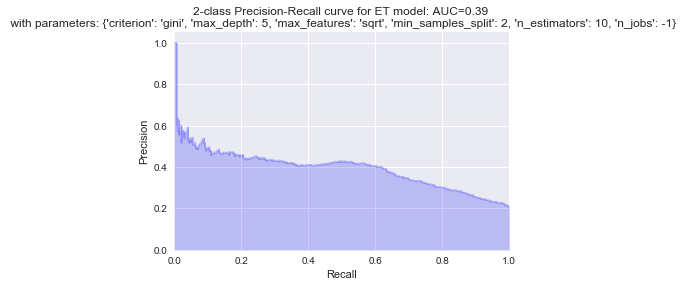

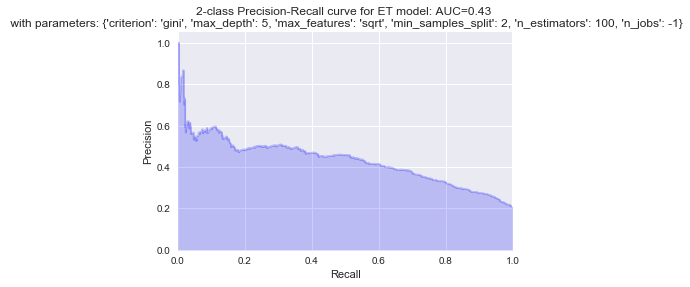

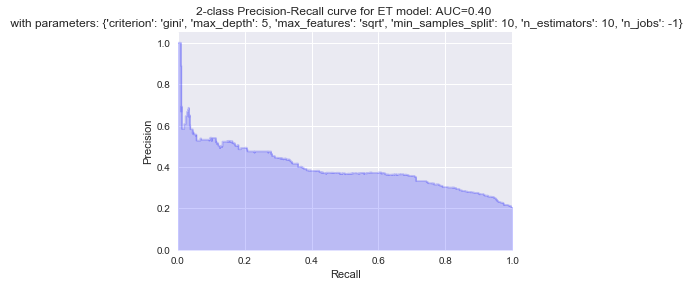

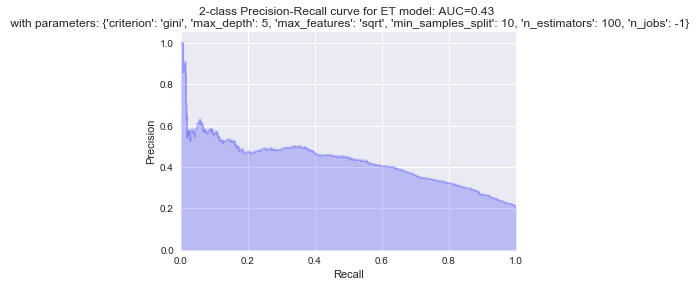

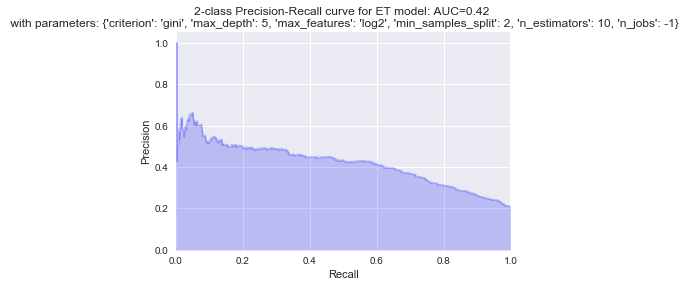

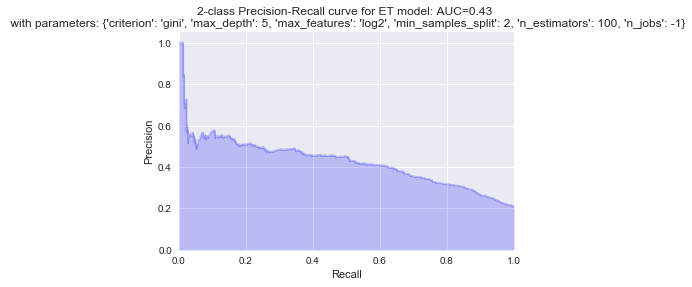

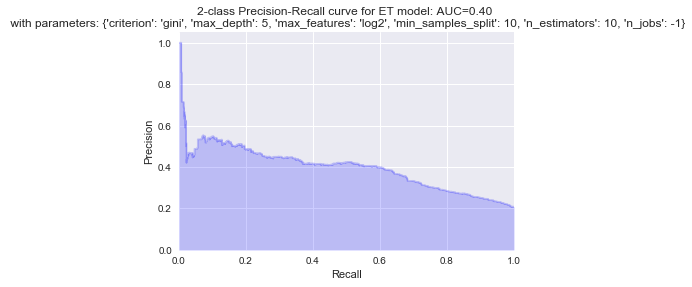

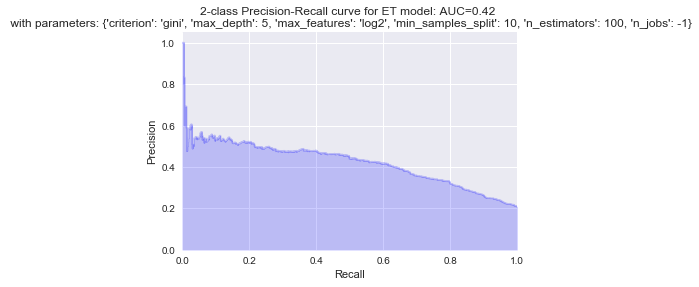

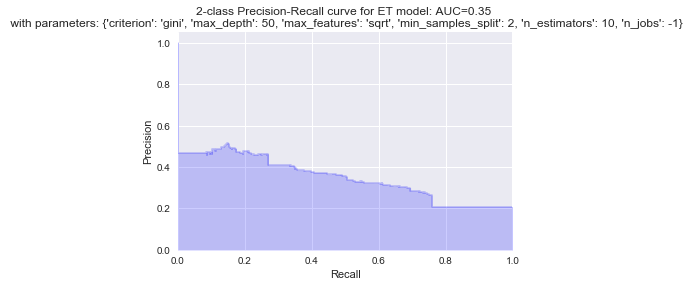

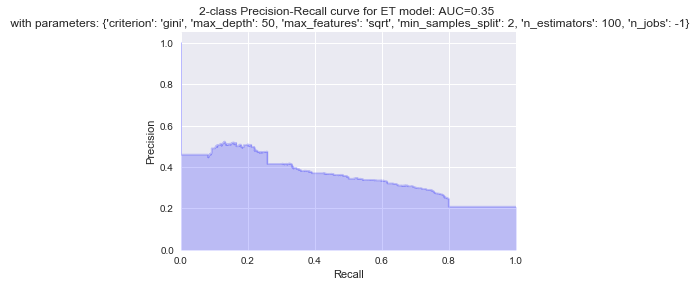

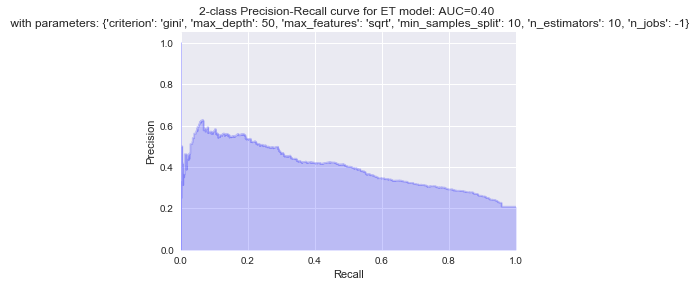

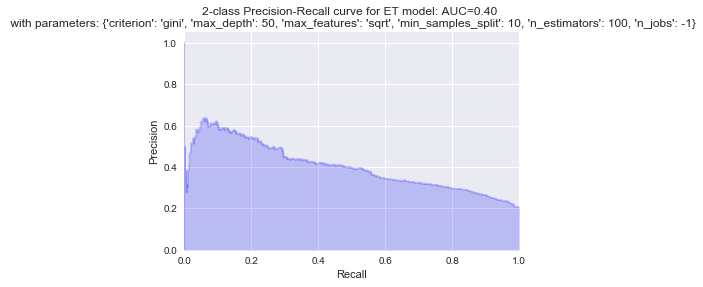

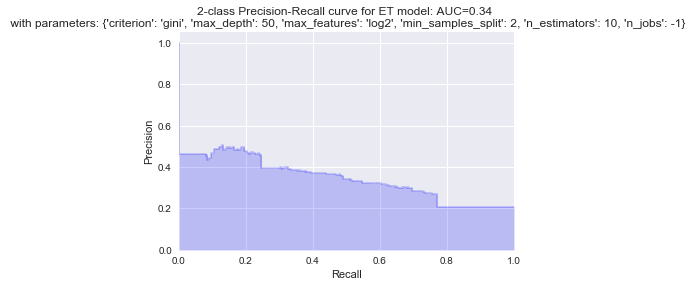

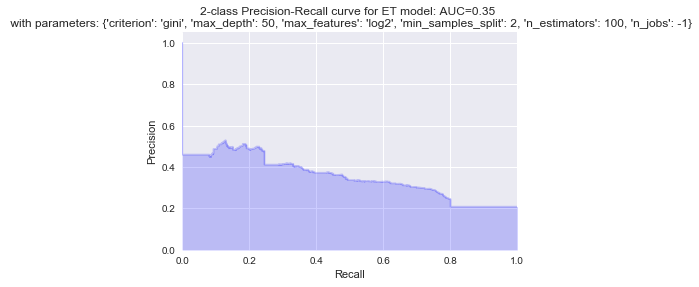

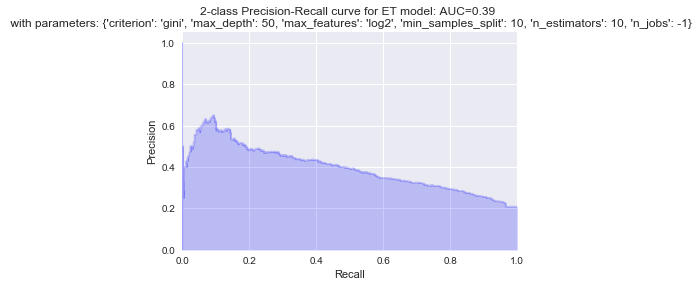

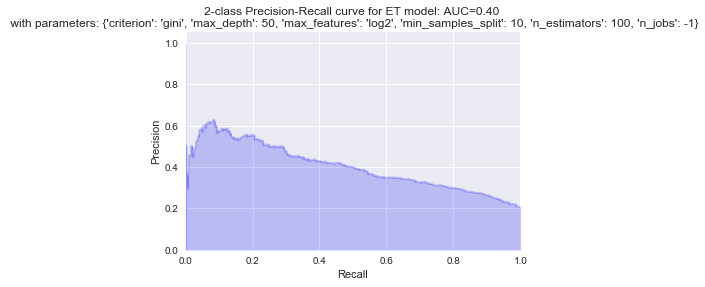

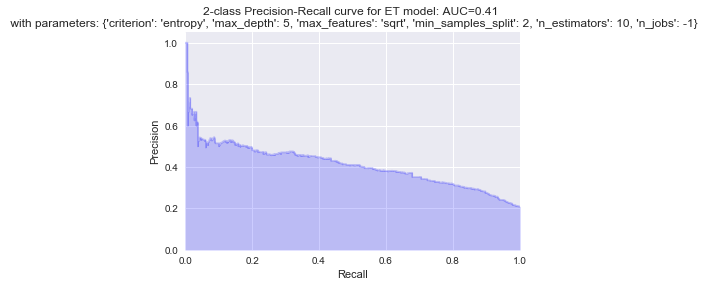

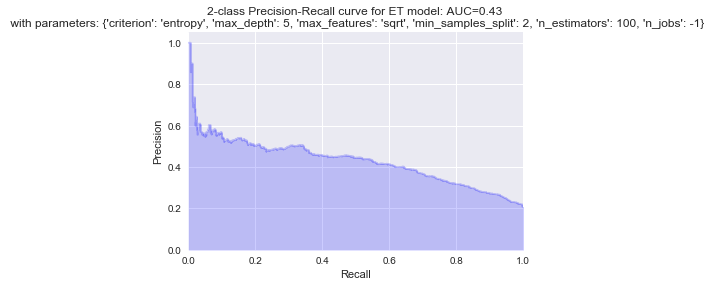

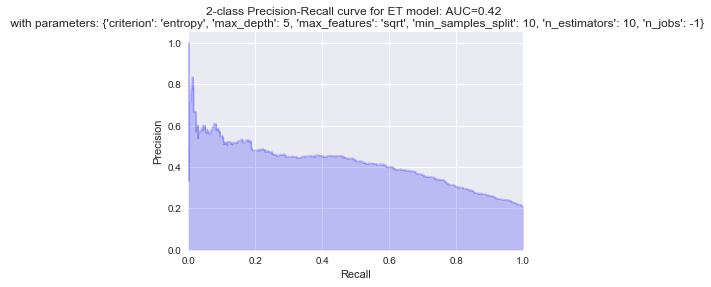

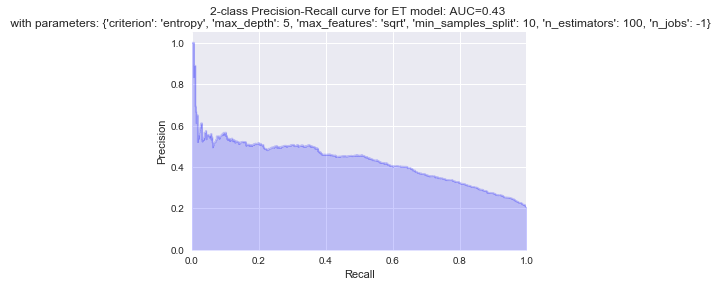

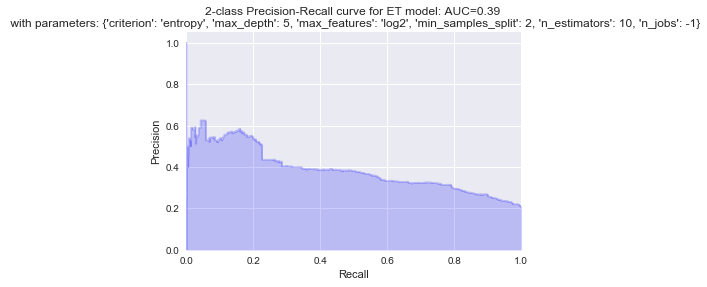

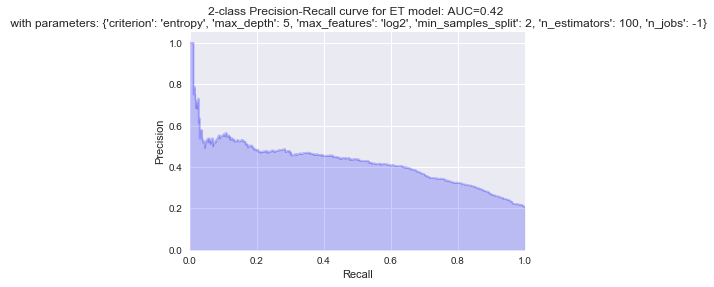

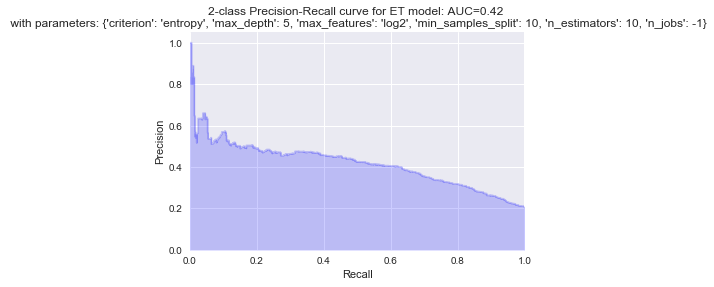

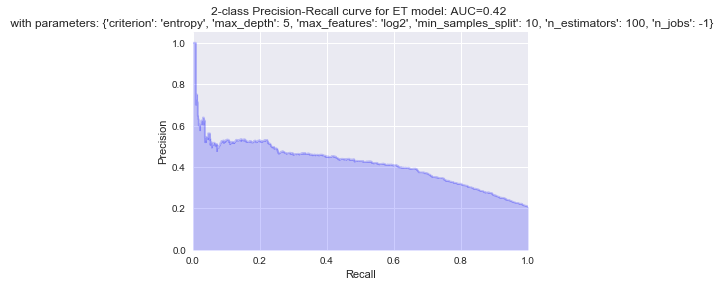

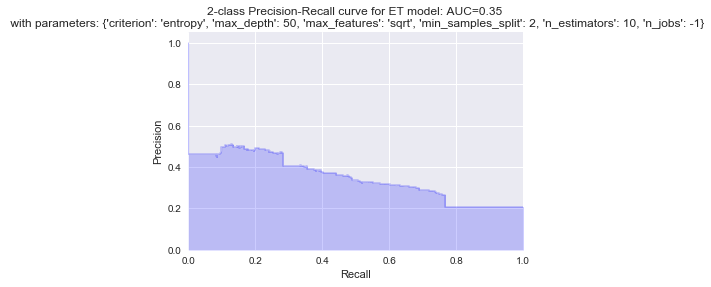

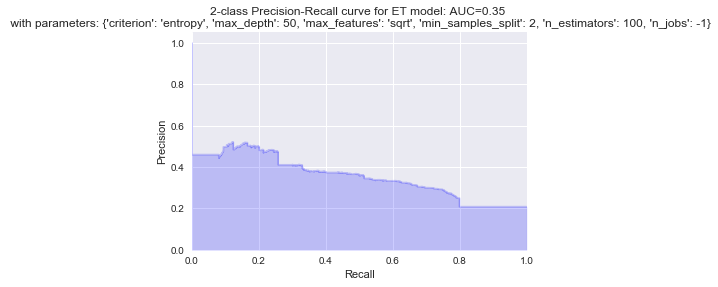

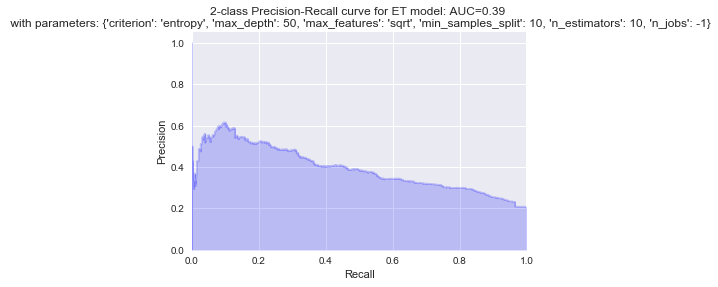

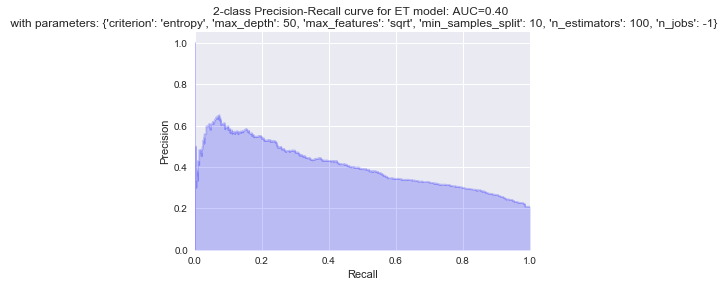

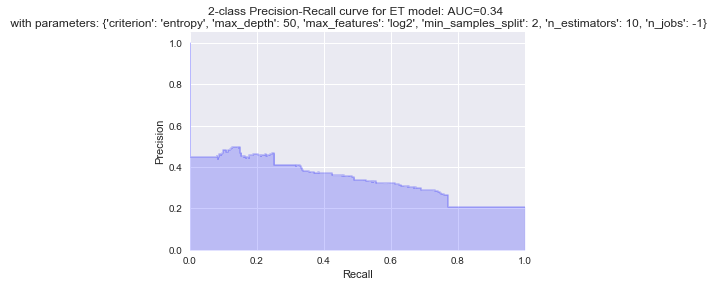

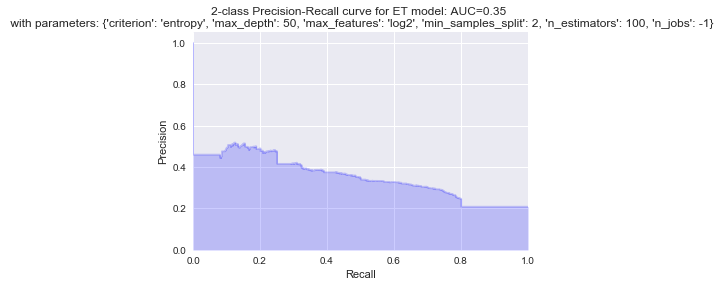

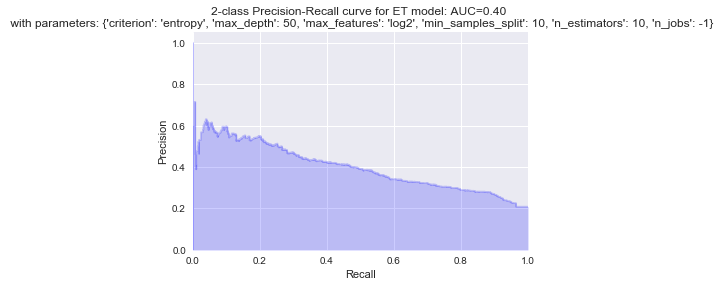

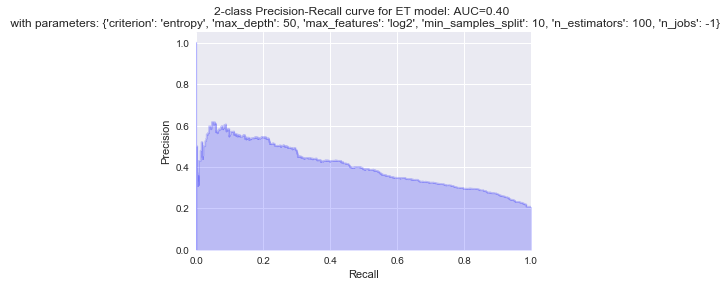

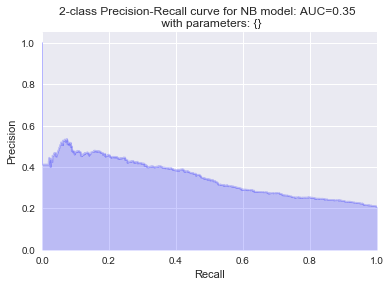

In [48]:
results = clf_loop(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"], x_train, x_test, y_train, y_test)

In [49]:
from IPython.display import display
display(results)

model_type                                         parameters  auc-roc  \
0           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   0.7373   
1           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   0.7428   
2           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   0.7437   
3           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   0.7500   
4           RF  {'max_depth': 5, 'max_features': 'log2', 'min_...   0.7018   
5           RF  {'max_depth': 5, 'max_features': 'log2', 'min_...   0.7403   
6           RF  {'max_depth': 5, 'max_features': 'log2', 'min_...   0.7223   
7           RF  {'max_depth': 5, 'max_features': 'log2', 'min_...   0.7444   
8           RF  {'max_depth': 50, 'max_features': 'sqrt', 'min...   0.6909   
9           RF  {'max_depth': 50, 'max_features': 'sqrt', 'min...   0.7015   
10          RF  {'max_depth': 50, 'max_features': 'sqrt', 'min...   0.7325   
11          RF  {'max_depth': 50, 'max_features': 'sqrt', 'min...   0.7340   
12          RF  {'max_depth': 50, 'max_features': 'log2', 'min...   0.6902   
13          RF  {'max_depth': 50, 'max_features': 'log2', 'min...   0.6986   
14          RF  {'max_depth': 50, 'max_features': 'log2', 'min...   0.7199   
15          RF  {'max_depth': 50, 'max_features': 'log2', 'min...   0.7332   
16       Boost          {'algorithm': 'SAMME', 'n_estimators': 1}   0.6347   
17       Boost         {'algorithm': 'SAMME', 'n_estimators': 10}   0.7398   
18       Boost        {'algorithm': 'SAMME', 'n_estimators': 100}   0.7419   
19       Boost       {'algorithm': 'SAMME', 'n_estimators': 1000}   0.7427   
20       Boost        {'algorithm': 'SAMME.R', 'n_estimators': 1}   0.6347   
21       Boost       {'algorithm': 'SAMME.R', 'n_estimators': 10}   0.7418   
22       Boost      {'algorithm': 'SAMME.R', 'n_estimators': 100}   0.7451   
23       Boost     {'algorithm': 'SAMME.R', 'n_estimators': 1000}   0.7453   
24         Bag  {'max_features': 5, 'max_samples': 5, 'n_estim...   0.4884   
25         Bag  {'max_features': 5, 'max_samples': 5, 'n_estim...   0.5310   
26         Bag  {'max_features': 5, 'max_samples': 5, 'n_estim...   0.6161   
27         Bag  {'max_features': 5, 'max_samples': 5, 'n_estim...   0.5739   
28         Bag  {'max_features': 5, 'max_samples': 10, 'n_esti...   0.5000   
29         Bag  {'max_features': 5, 'max_samples': 10, 'n_esti...   0.5095   
..         ...                                                ...      ...   
85          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...   0.7470   
86          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...   0.7415   
87          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...   0.7437   
88          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...   0.7188   
89          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...   0.7438   
90          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...   0.6673   
91          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...   0.6708   
92          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...   0.7159   
93          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...   0.7200   
94          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...   0.6683   
95          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...   0.6703   
96          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...   0.7151   
97          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...   0.7213   
98          ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...   0.7367   
99          ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...   0.7490   
100         ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...   0.7369   
101         ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...   0.7502   
102         ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...   0.7115   
103         ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...   0.7450   
104         ET  {'criterio

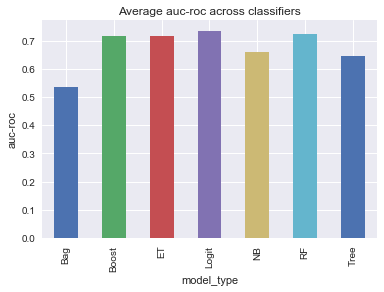

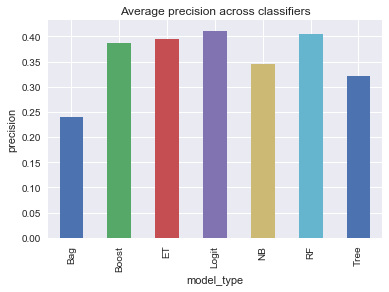

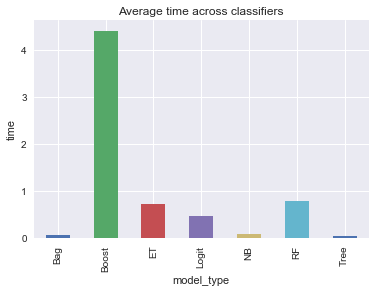

In [50]:
for item in ['auc-roc','precision','time']:
    plt.figure()
    results.groupby(['model_type'])[item].mean().plot(kind='bar', title='Average '+item+' across classifiers')
    plt.ylabel(item)

In [51]:
best =results.groupby('model_type')['auc-roc'].nlargest(1)
best

model_type     
Bag         30     0.6977
Boost       23     0.7453
ET          83     0.7515
Logit       44     0.7446
NB          114    0.6612
RF          3      0.7500
Tree        66     0.7100
Name: auc-roc, dtype: float64

In [54]:
rows = [30,23,83,44,114,3,66]

In [55]:
results.loc[rows].iloc[:,0::]

model_type                                         parameters  auc-roc  \
30         Bag  {'max_features': 5, 'max_samples': 10, 'n_esti...   0.6977   
23       Boost     {'algorithm': 'SAMME.R', 'n_estimators': 1000}   0.7453   
83          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...   0.7515   
44       Logit                        {'C': 0.1, 'penalty': 'l1'}   0.7446   
114         NB                                                 {}   0.6612   
3           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   0.7500   
66        Tree  {'criterion': 'entropy', 'max_depth': 5, 'max_...   0.7100   

     precision     time  precision,recall,f1 at_5 precision,recall,f1 at_10  \
30      0.3764   0.0544   (0.5118, 0.1227, 0.198)   (0.4735, 0.2271, 0.307)   
23      0.4185  16.7762  (0.5471, 0.1312, 0.2116)  (0.4824, 0.2313, 0.3127)   
83      0.4322   0.6038  (0.5529, 0.1326, 0.2139)     (0.5, 0.2398, 0.3241)   
44      0.4222   0.3561  (0.5353, 0.1283, 0.2071)   (0.4735, 0.2271, 0.307)   
114     0.3457   0.0907   (0.4706, 0.1128, 0.182)  (0.4471, 0.2144, 0.2898)   
3       0.4275   0.6955  (0.5294, 0.1269, 0.2048)  (0.4824, 0.2313, 0.3127)   
66      0.3662   0.0235  (0.8294, 0.1989, 0.3208)  (0.4618, 0.2214, 0.2993)   

    precision,recall,f1 at_20 precision,recall,f1 at_30  \
30   (0.4038, 0.3879, 0.3957)  (0.3611, 0.5205, 0.4263)   
23    (0.4552, 0.4372, 0.446)  (0.4168, 0.6008, 0.4922)   
83   (0.4523, 0.4344, 0.4432)  (0.4129, 0.5952, 0.4876)   
44   (0.4596, 0.4415, 0.4504)  (0.4227, 0.6093, 0.4991)   
114   (0.3935, 0.378, 0.3856)  (0.3415, 0.4922, 0.4032)   
3    (0.4567, 0.4386, 0.4475)  (0.4129, 0.5952, 0.4876)   
66   (0.5066, 0.4866, 0.4964)   (0.4149, 0.598, 0.4899)   

    precision,recall,f1 at_50  
30   (0.2995, 0.7193, 0.4229)  
23   (0.3294, 0.7913, 0.4652)  
83   (0.3306, 0.7941, 0.4668)  
44   (0.3288, 0.7898, 0.4643)  
114  (0.2772, 0.6657, 0.3914)  
3    (0.3306, 0.7941, 0.4668)  
66   (0.3764, 0.9041, 0.5315)

In [56]:
best = {}
for row in rows:
    best[results.loc[row]["model_type"]]=results.loc[row]["parameters"]

In [57]:
for k,arg in best.items():
    for key,val in arg.items():
        arg[key] = [val]

In [58]:
for k, arg in best.items():
    print(arg)

{'max_features': [5], 'max_samples': [10], 'n_estimators': [20]}
{'algorithm': ['SAMME.R'], 'n_estimators': [1000]}
{'criterion': ['gini'], 'max_depth': [5], 'max_features': ['sqrt'], 'min_samples_split': [2], 'n_estimators': [100], 'n_jobs': [-1]}
{'C': [0.1], 'penalty': ['l1']}
{}
{'max_depth': [5], 'max_features': ['sqrt'], 'min_samples_split': [10], 'n_estimators': [100]}
{'criterion': ['entropy'], 'max_depth': [5], 'max_features': ['sqrt'], 'min_samples_split': [2]}


In [59]:
def plot_best(models, x_train, x_test, y_train, y_test, bestm = best):
    '''
    Run model with the best given params on x and y
    and print out the scores for comparison
    '''
    for index, clf in enumerate([clfs[x] for x in models]):
        model_params = bestm[models[index]]
        for p in ParameterGrid(model_params):
            try:
                clf.set_params(**p)
                y_pred_probs = clf.fit(x_train, y_train).predict_proba(x_test)[:,1]
                plot_precision_recall_n(y_test, y_pred_probs, models[index],p)
                
            except IndexError as e:
                print(e)
                continue
    

In [60]:
def plot_precision_recall_n(y_true, y_score, model_name,  para = None, fig =None):
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_score)
    precision_curve = precision_curve[:-1]
    recall_curve = recall_curve[:-1]
    pct_above_per_thresh = []
    number_scored = len(y_score)
    for value in pr_thresholds:
        num_above_thresh = len(y_score[y_score>=value])
        pct_above_thresh = num_above_thresh / float(number_scored)
        pct_above_per_thresh.append(pct_above_thresh)
    pct_above_per_thresh = np.array(pct_above_per_thresh)
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(pct_above_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax2 = ax1.twinx()
    ax2.plot(pct_above_per_thresh, recall_curve, 'r')
    ax2.set_ylabel('recall', color='r')
    
    plt.title('2-class Precision-Recall curve for {} model: AUC={:.2f} \n with parameters: {}'.\
                        format(model_name, average_precision_score(y_true, y_score), para))
    plt.show()
    

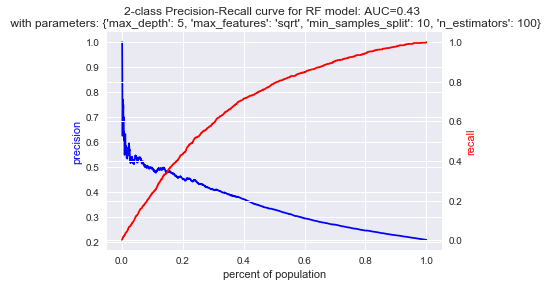

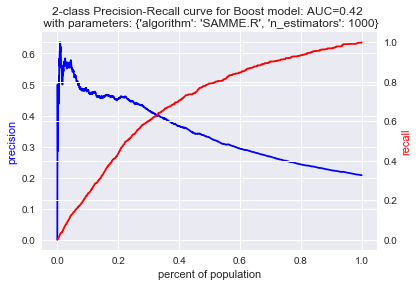

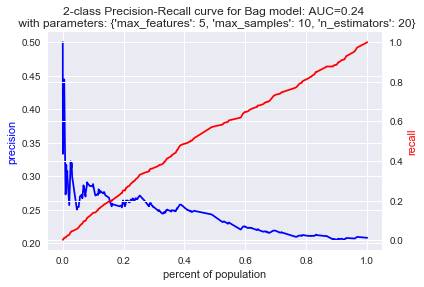

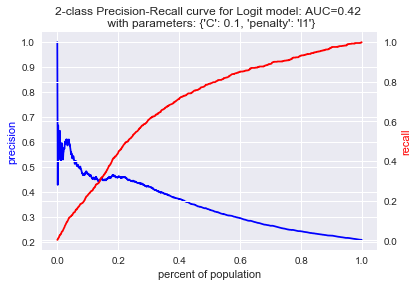

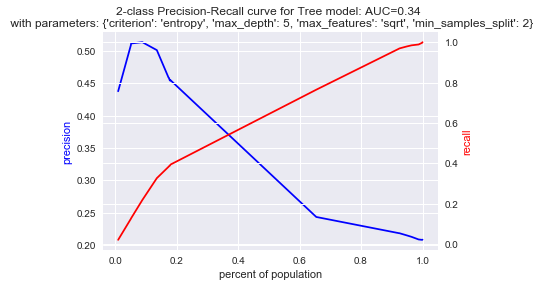

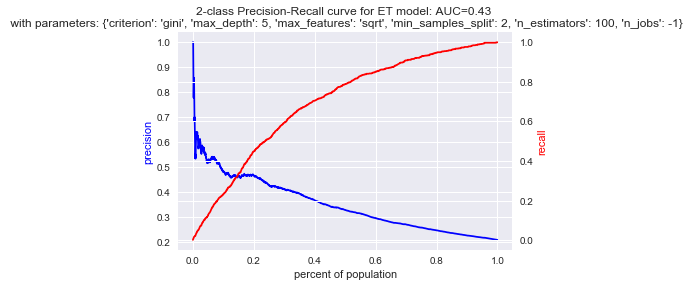

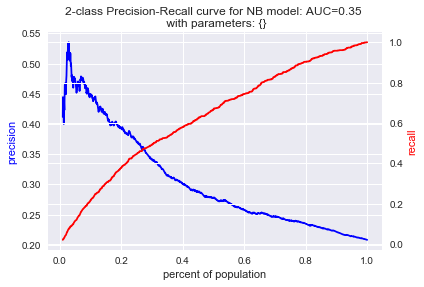

In [61]:
plot_best(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"], x_train, x_test, y_train, y_test)

In [ ]:
#Printing out the best decision tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt', min_samples_split=5)

In [ ]:
tree = dt.fit(x_train, y_train)

In [ ]:
tree_viz = export_graphviz(tree, out_file=None, feature_names=indepv, rounded=True, filled=True)
graph =graphviz.Source(tree_viz)

In [ ]:
graph

In [ ]:
#Running classifiers to predict if the person re-enter within two years

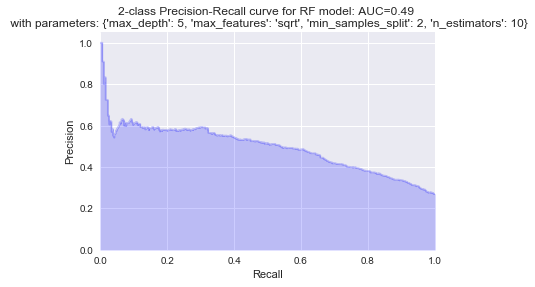

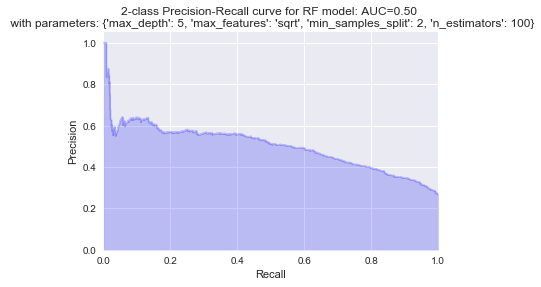

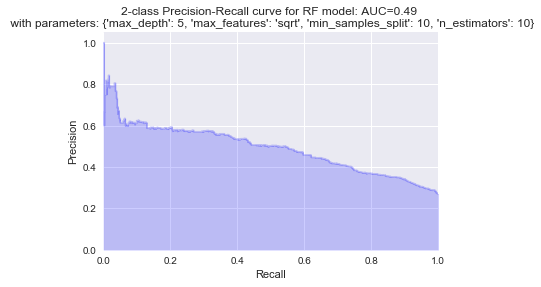

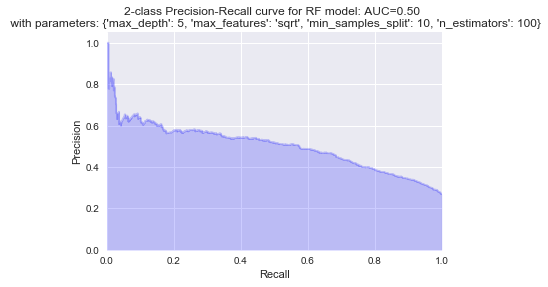

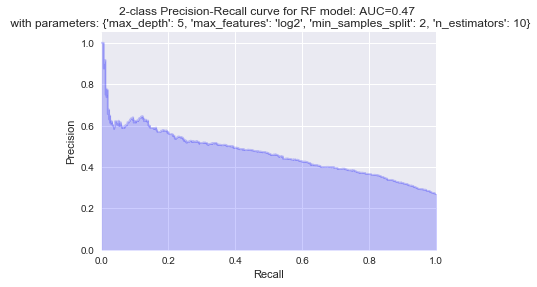

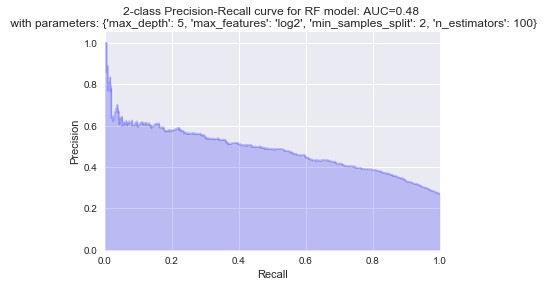

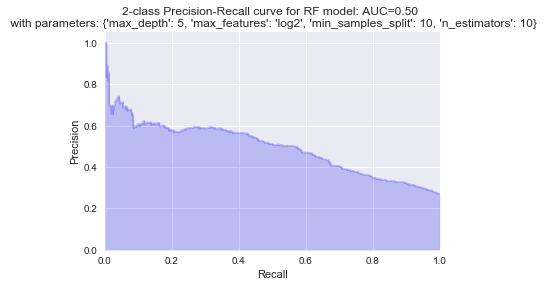

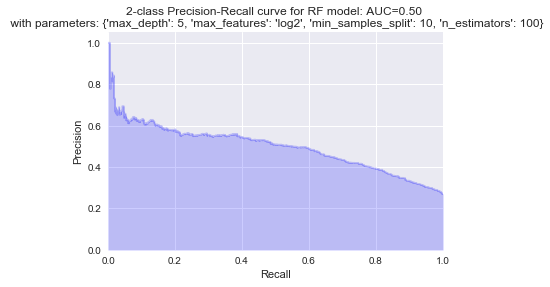

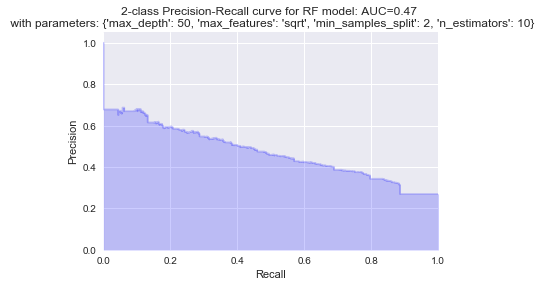

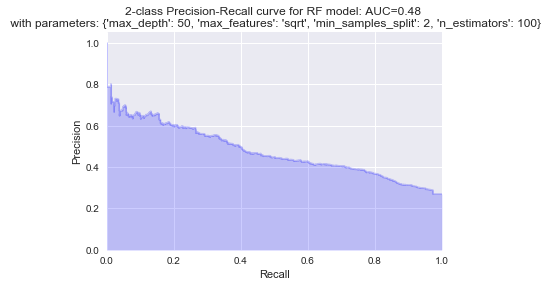

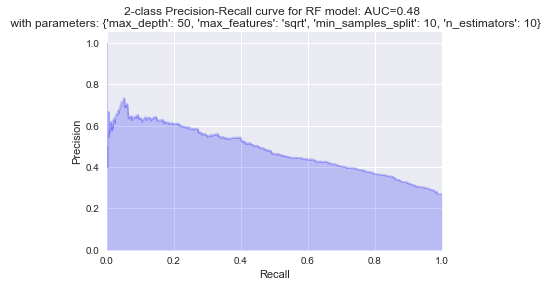

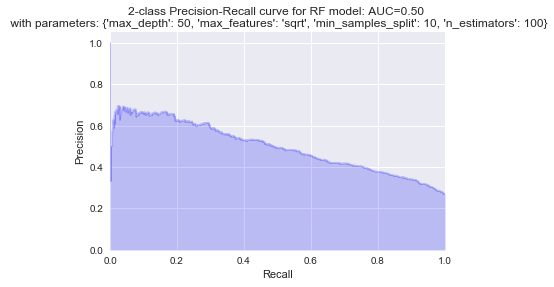

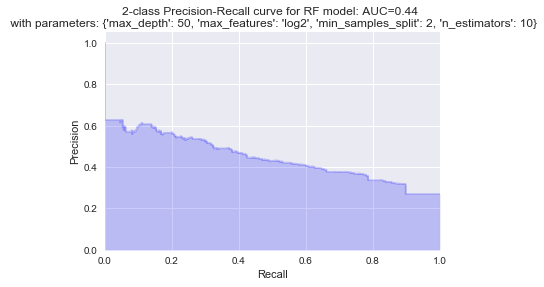

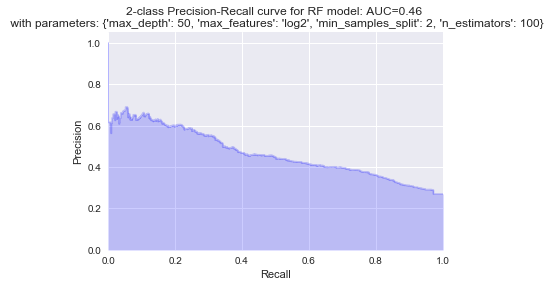

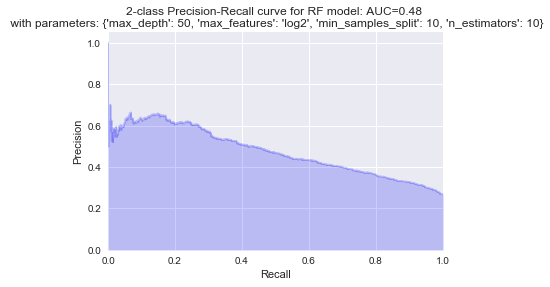

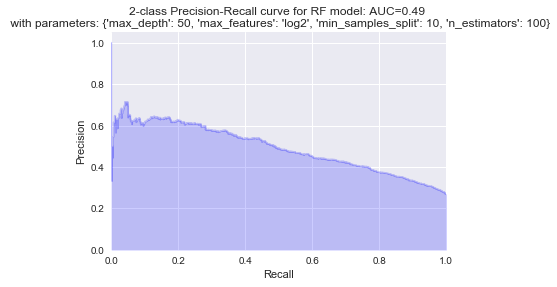

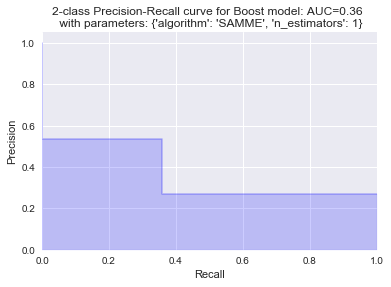

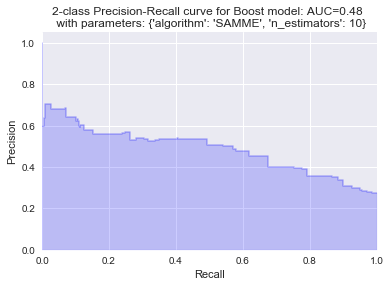

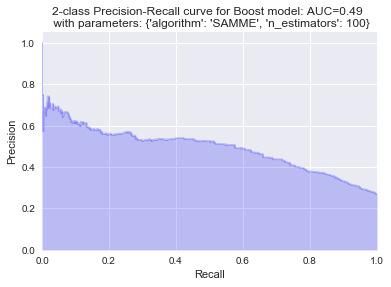

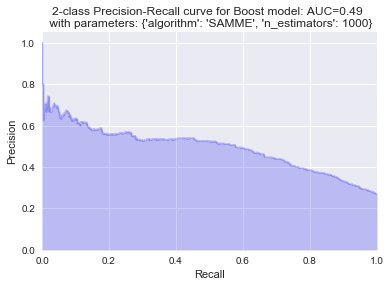

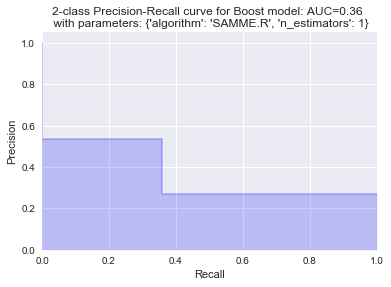

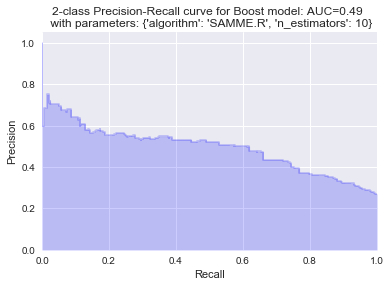

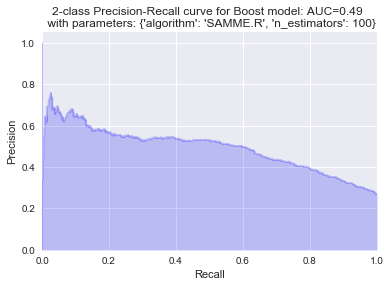

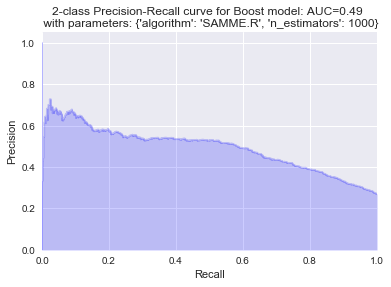

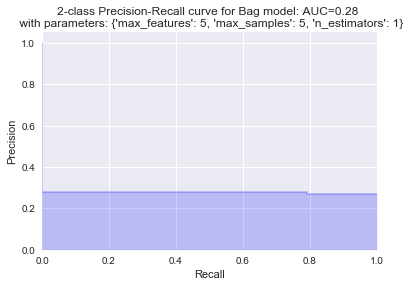

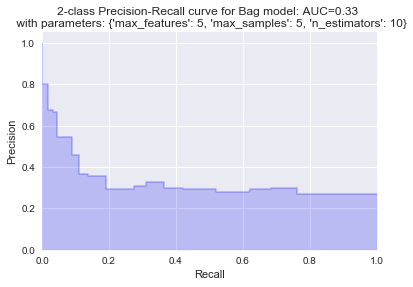

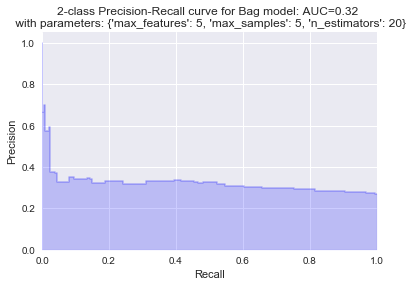

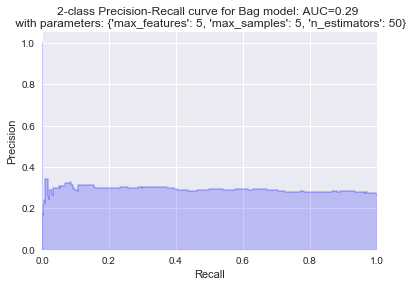

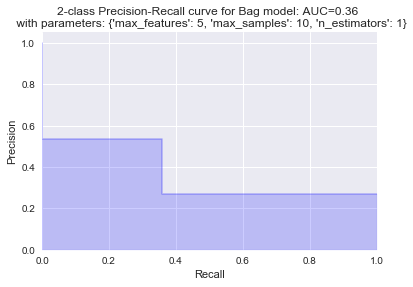

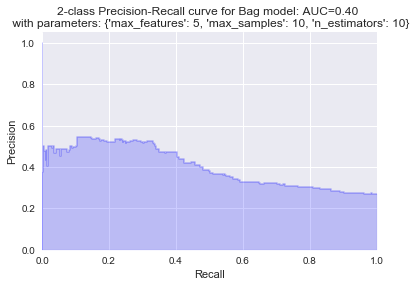

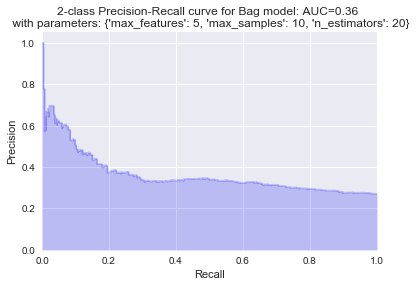

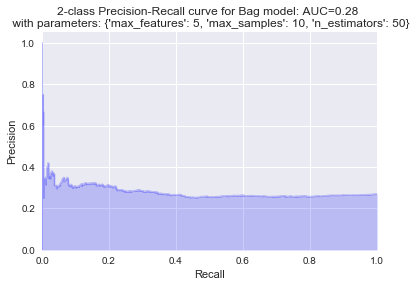

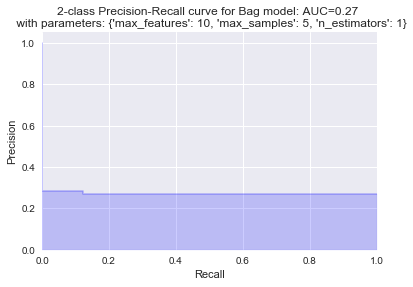

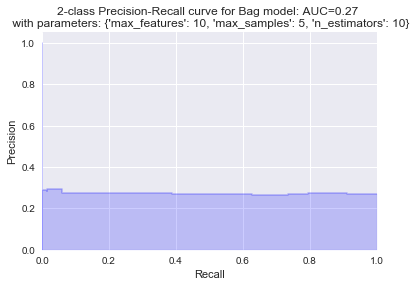

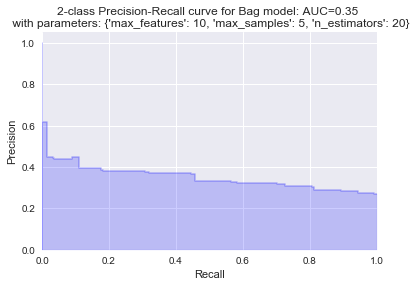

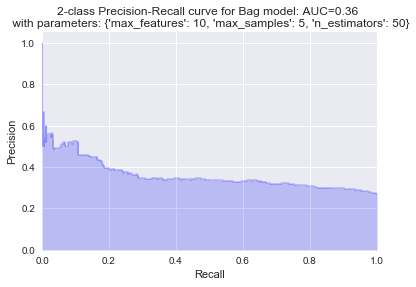

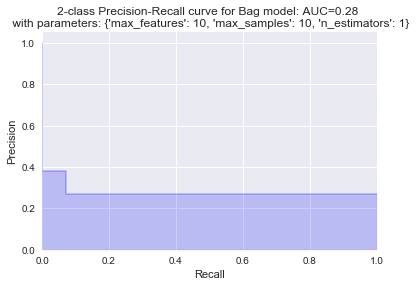

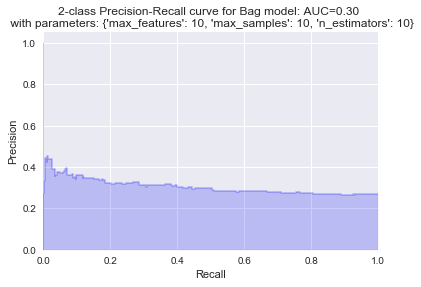

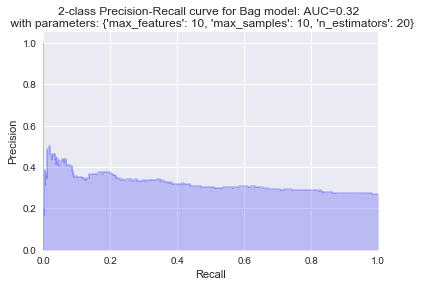

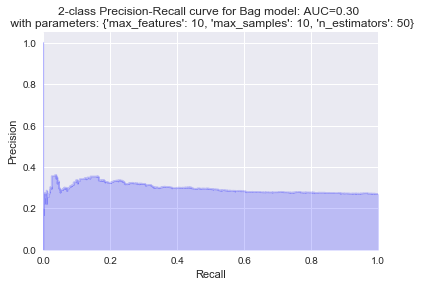

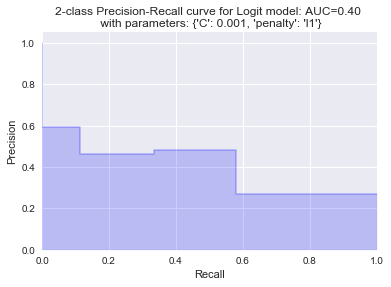

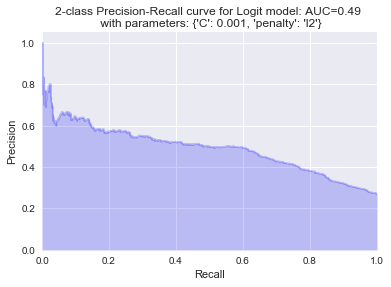

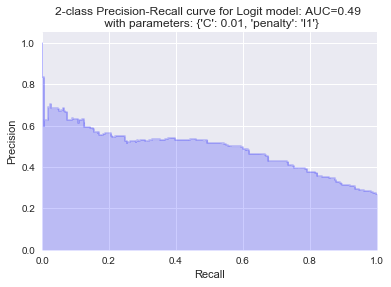

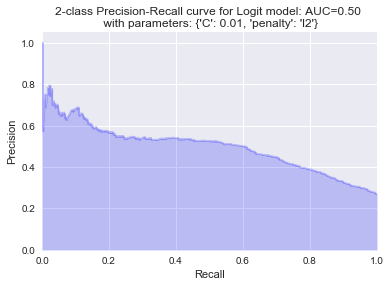

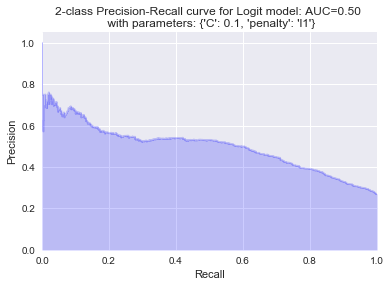

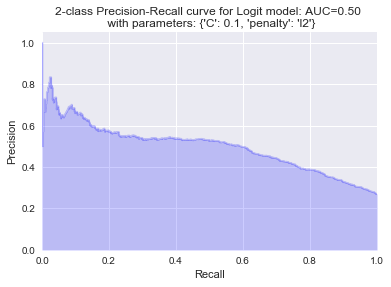

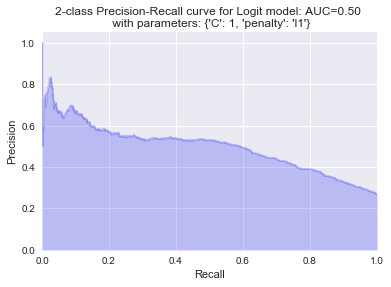

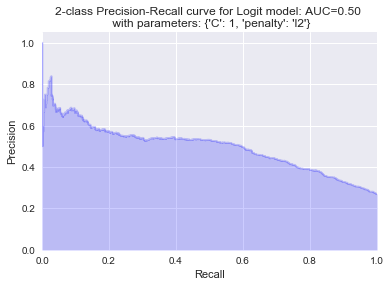

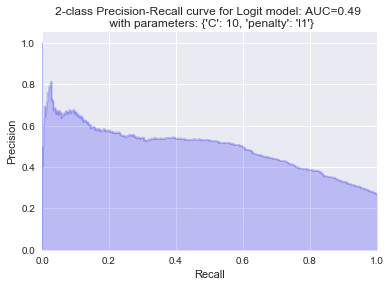

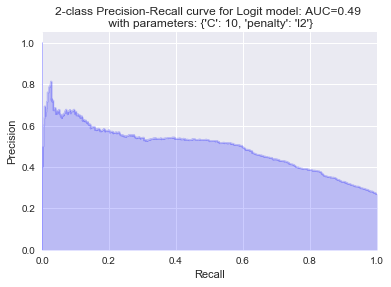

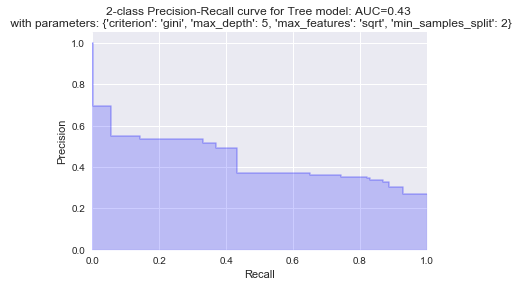

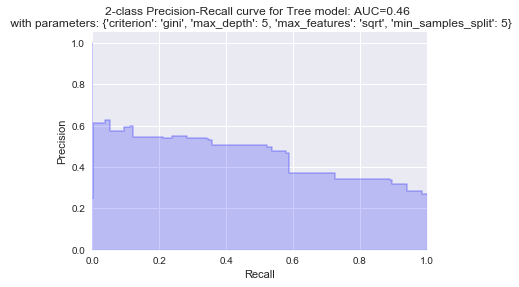

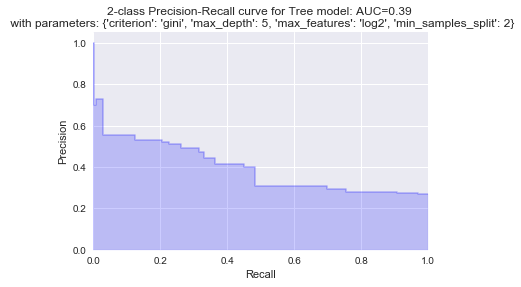

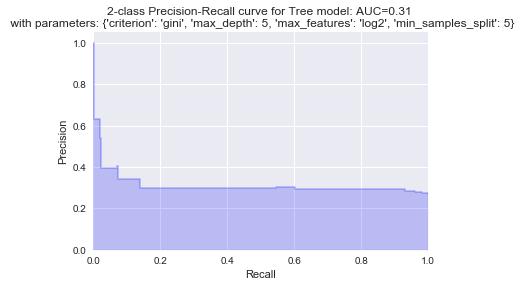

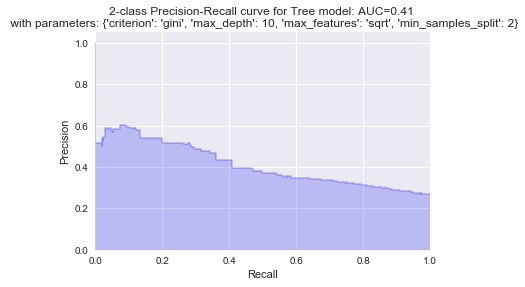

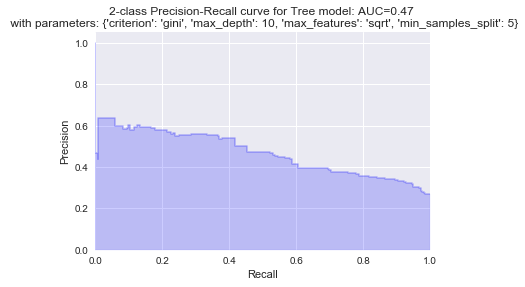

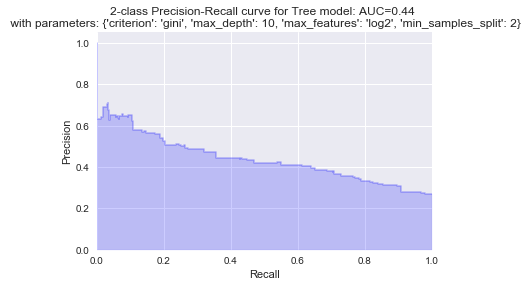

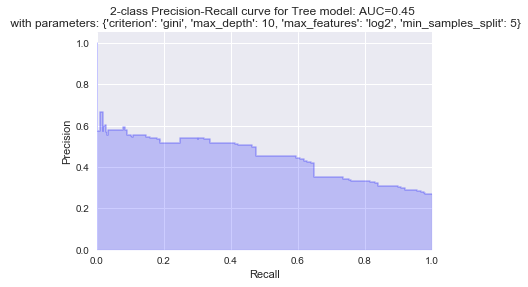

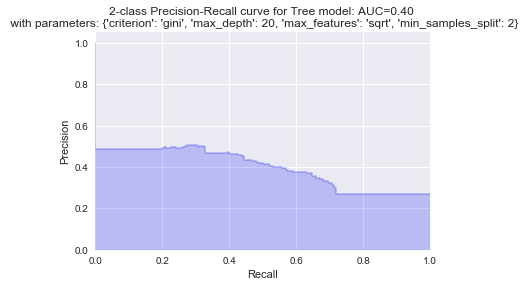

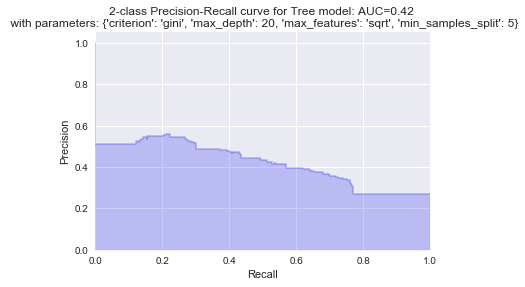

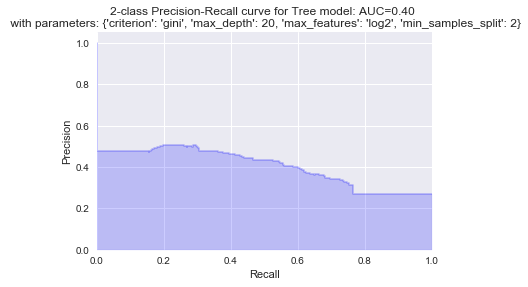

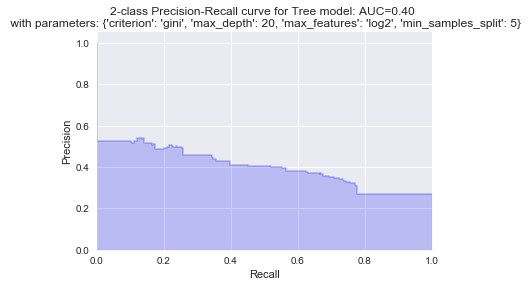

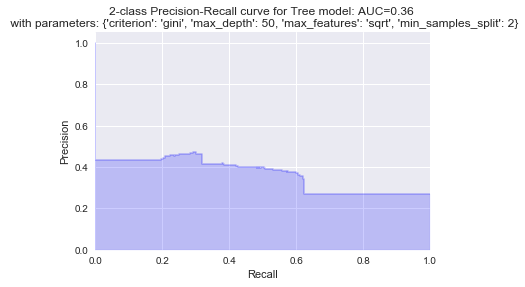

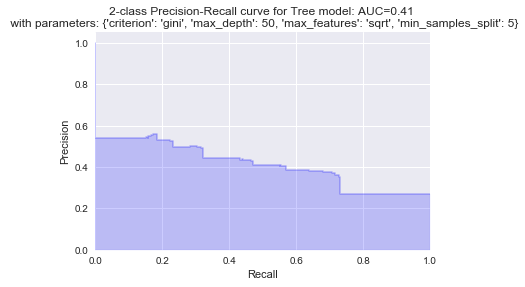

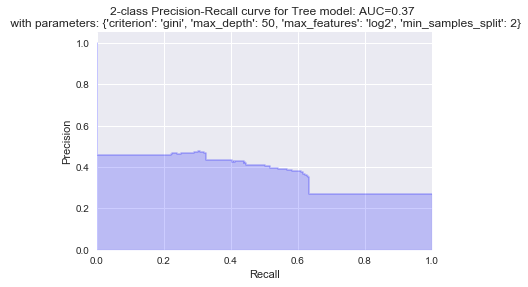

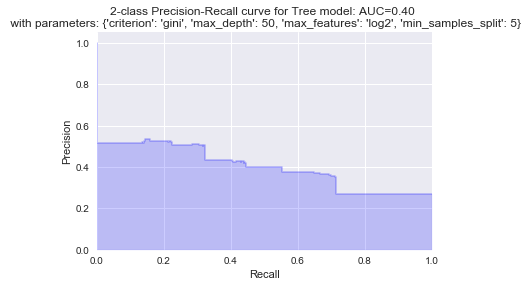

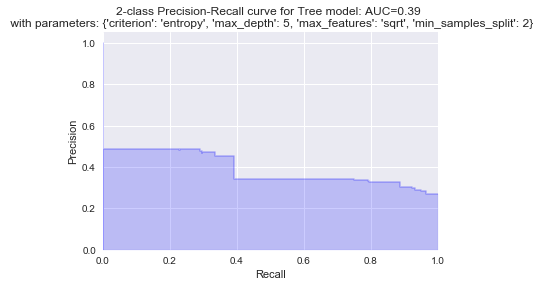

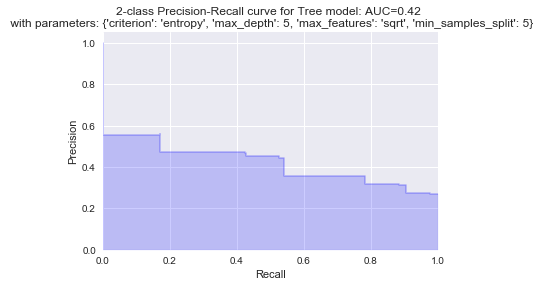

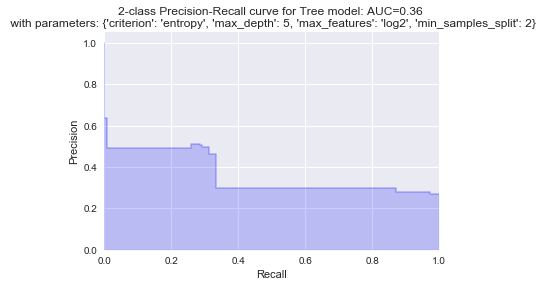

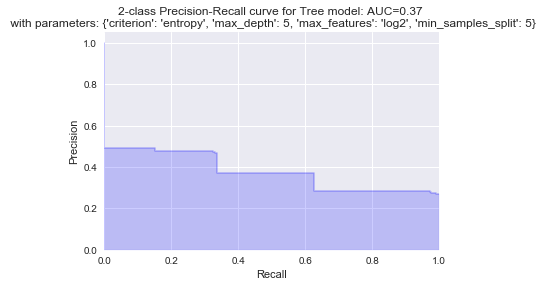

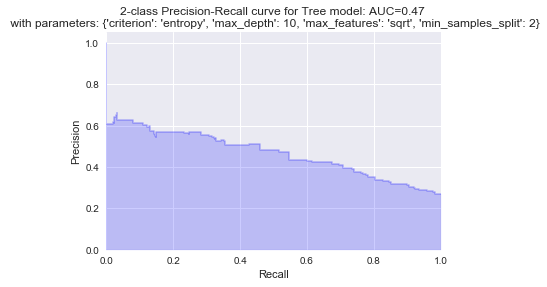

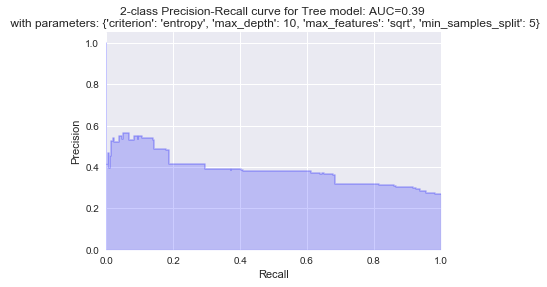

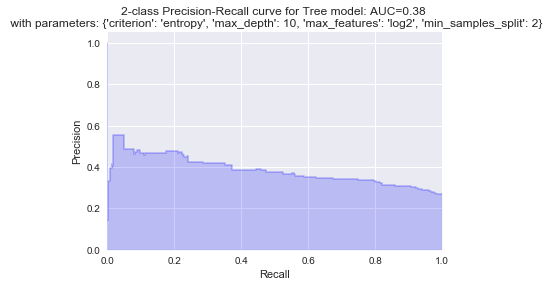

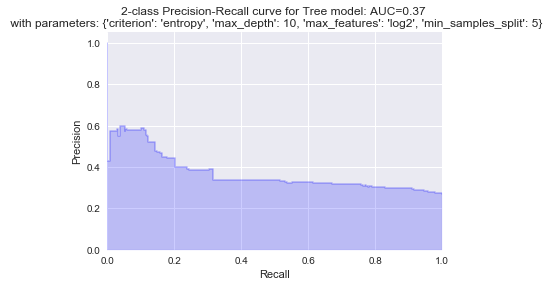

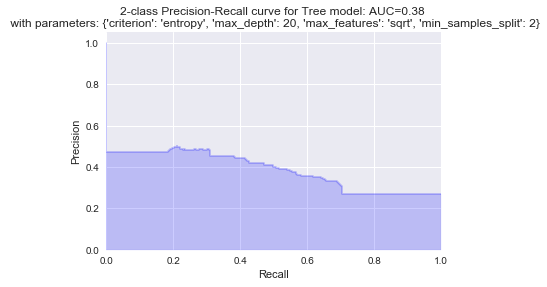

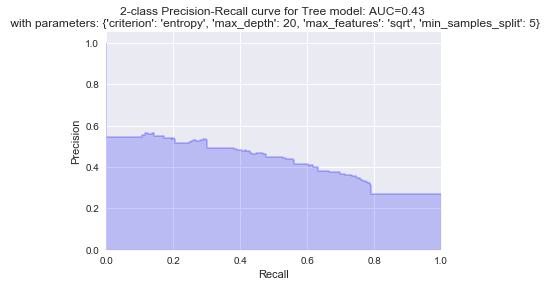

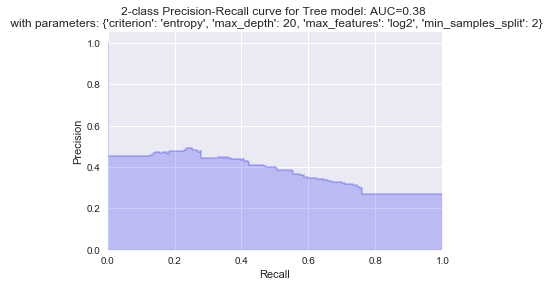

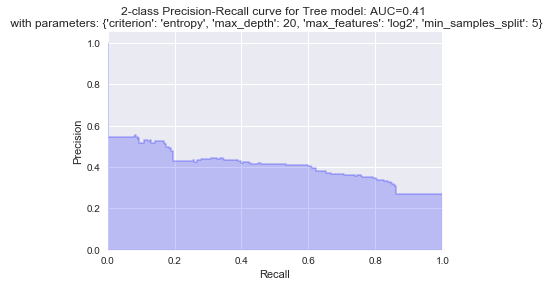

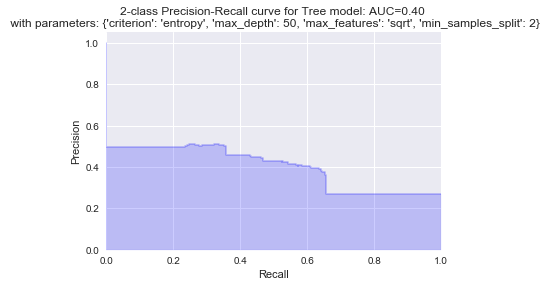

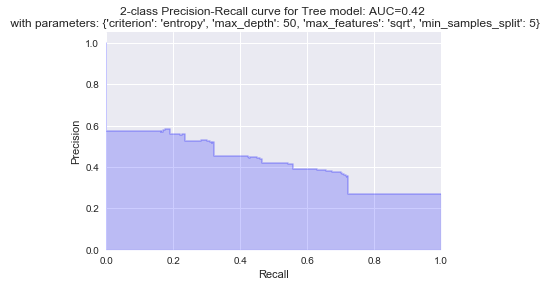

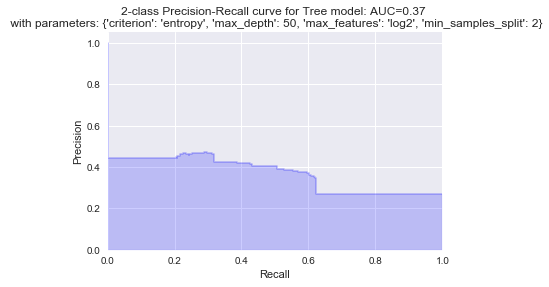

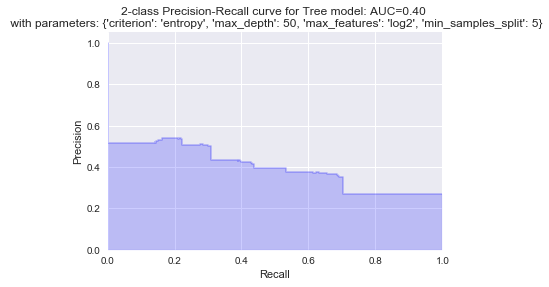

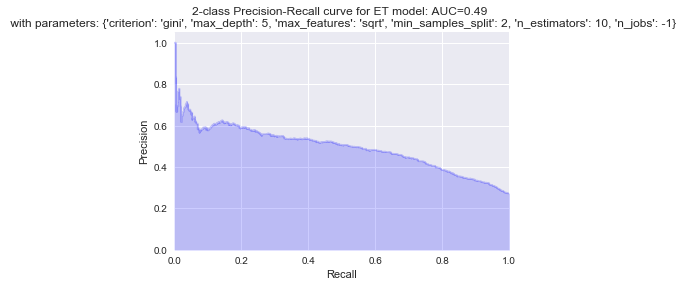

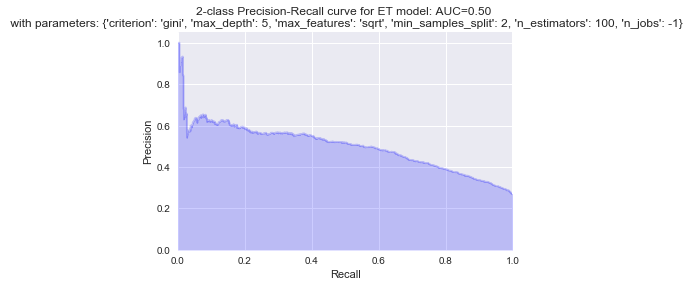

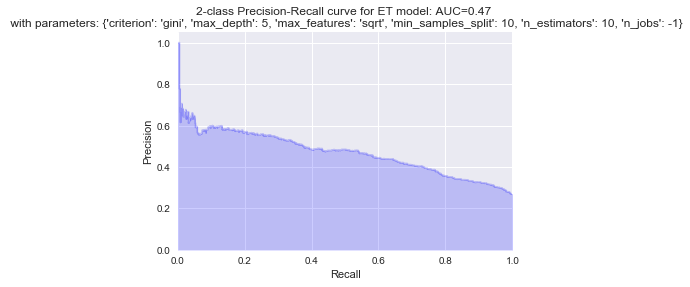

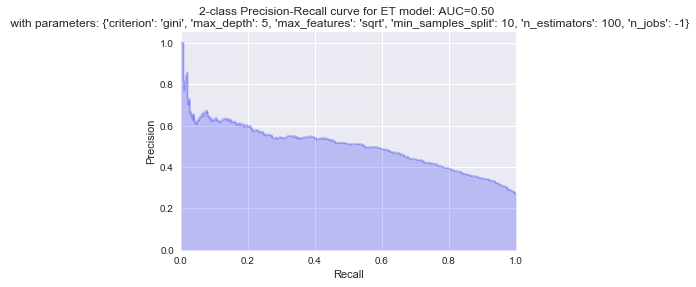

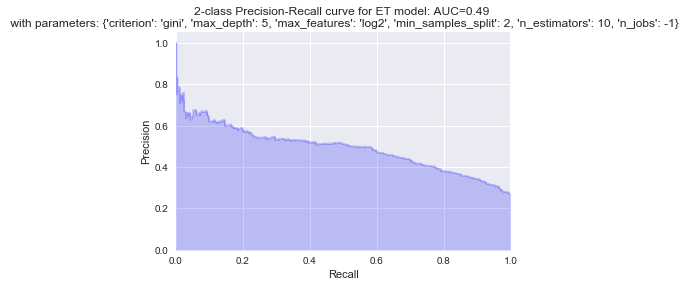

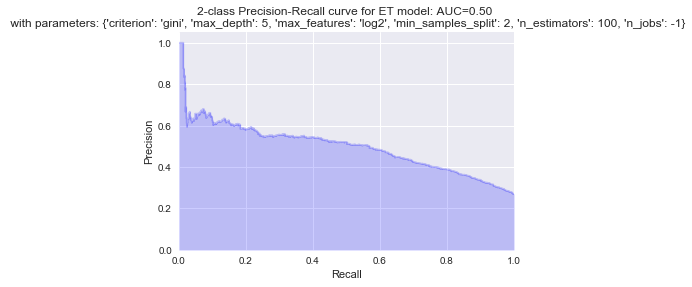

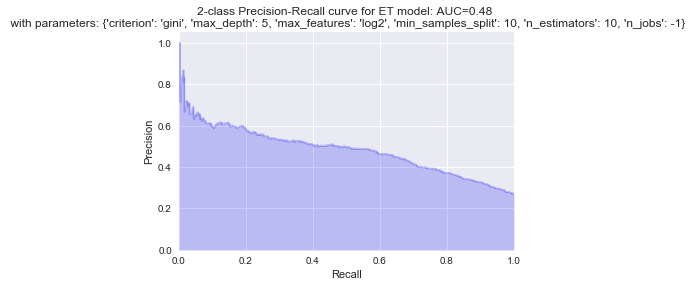

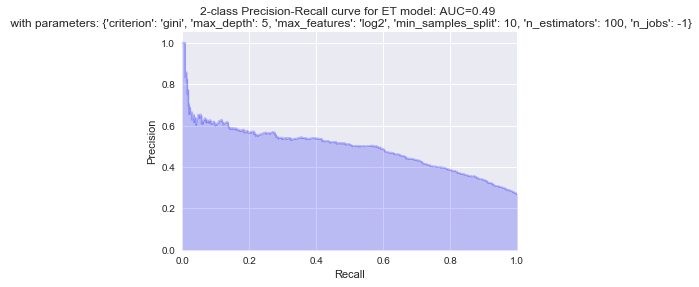

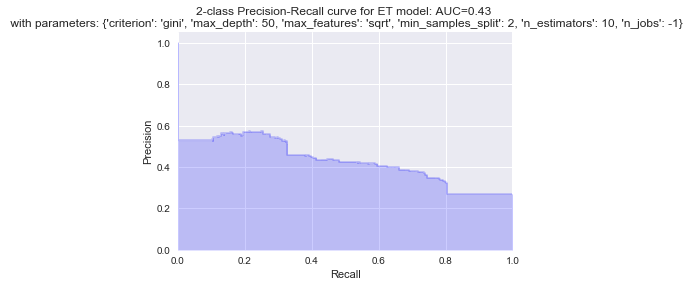

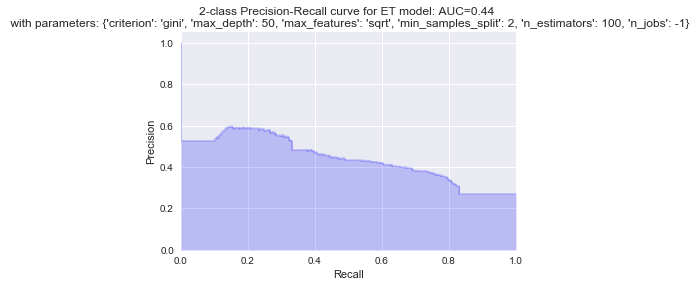

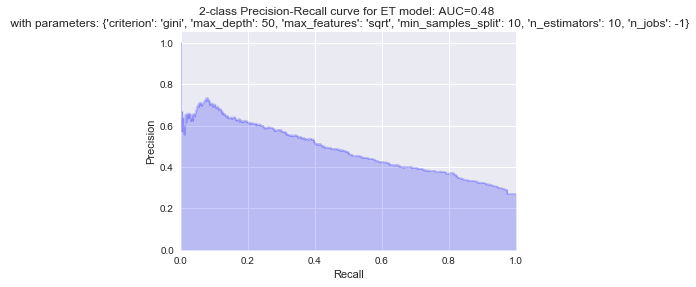

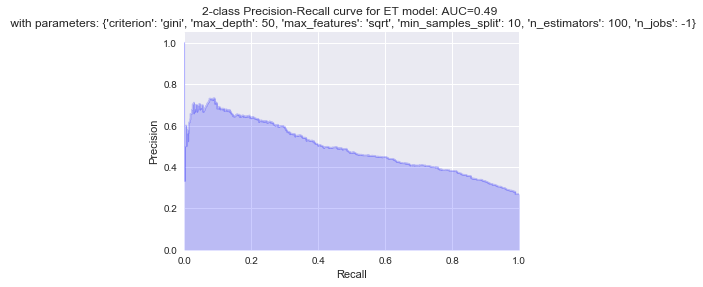

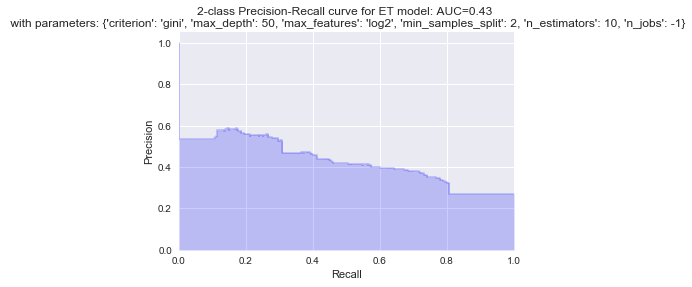

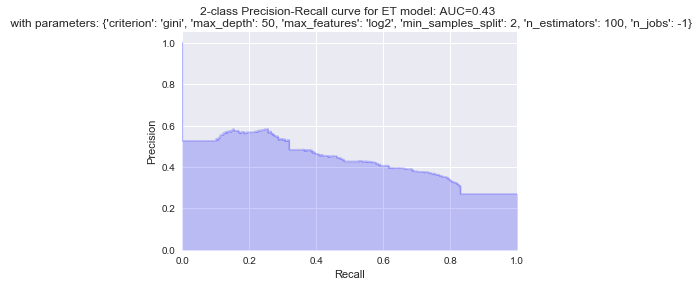

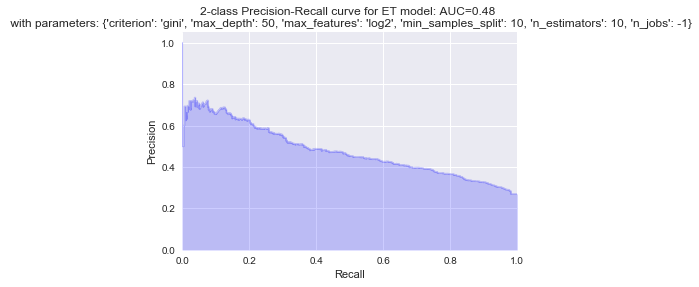

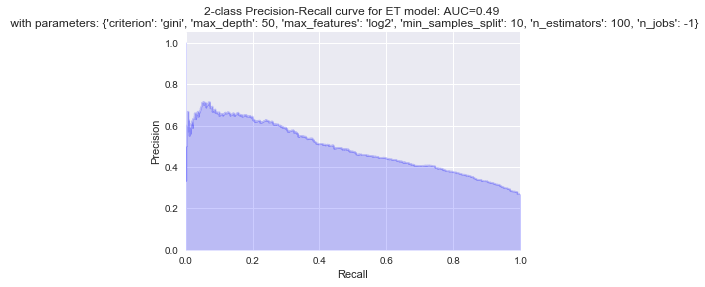

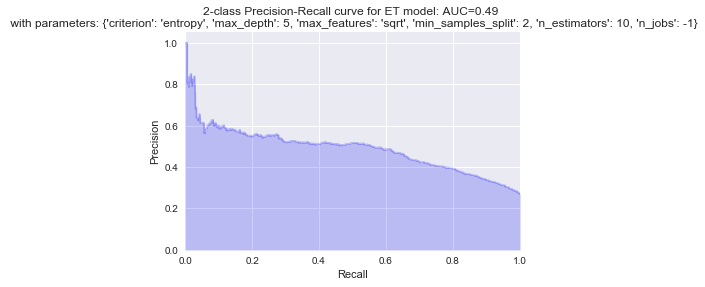

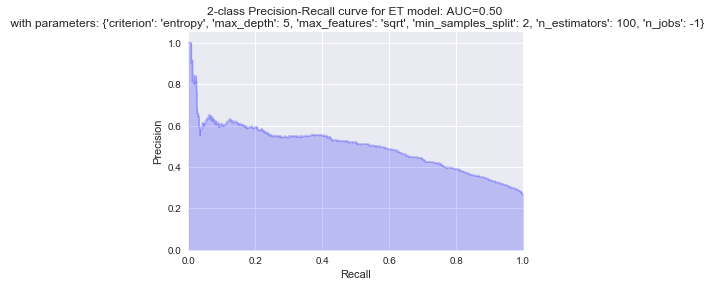

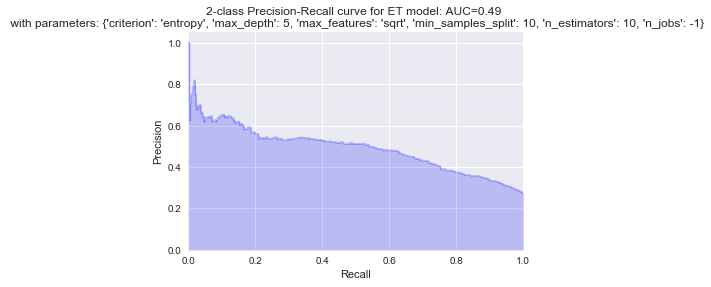

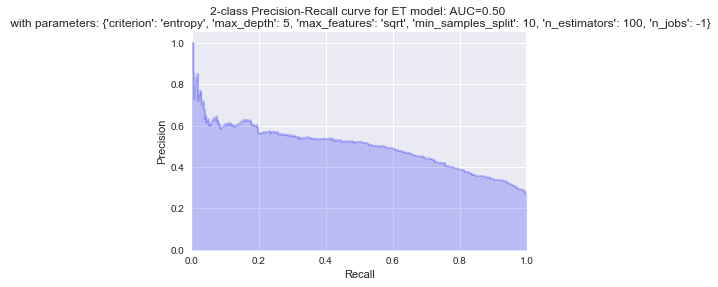

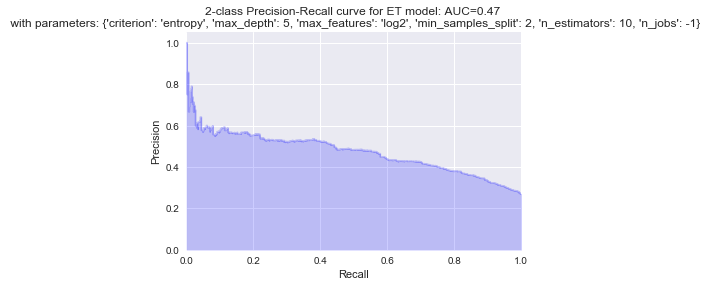

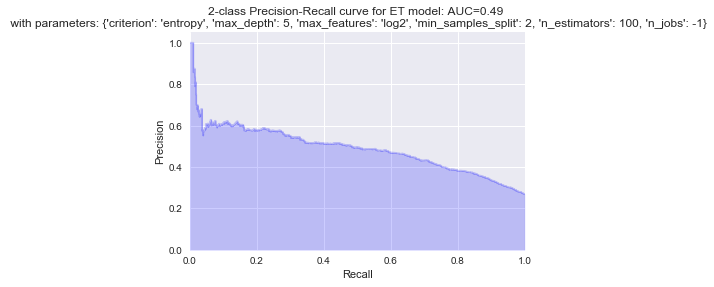

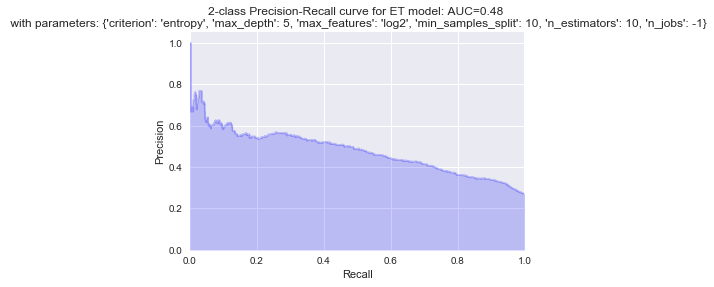

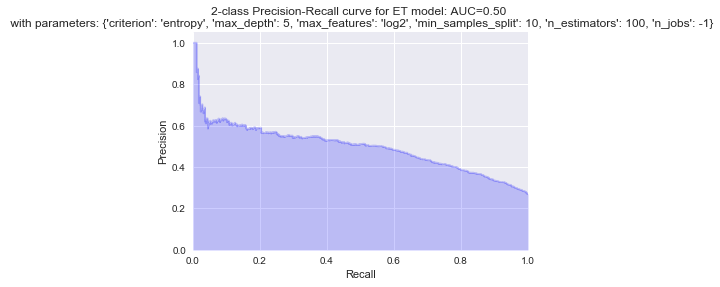

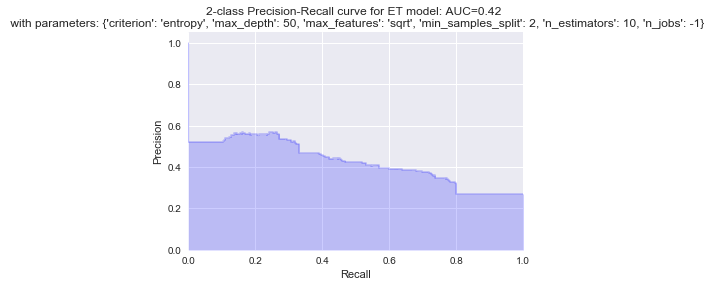

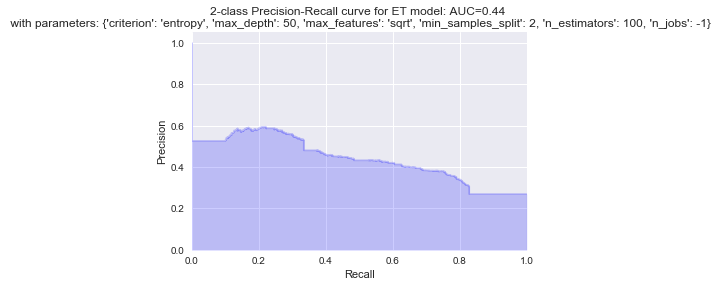

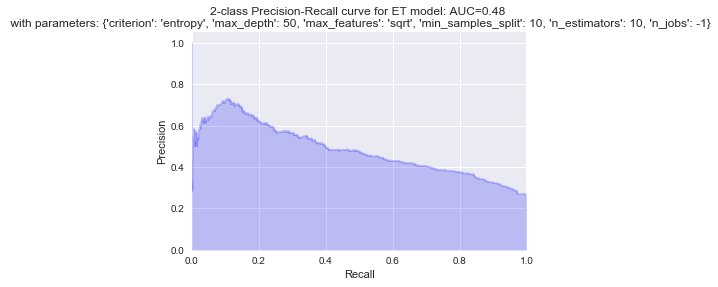

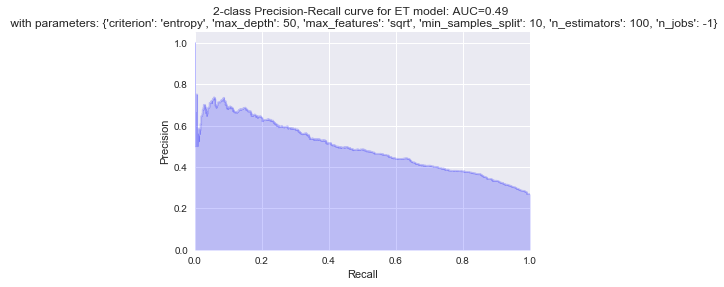

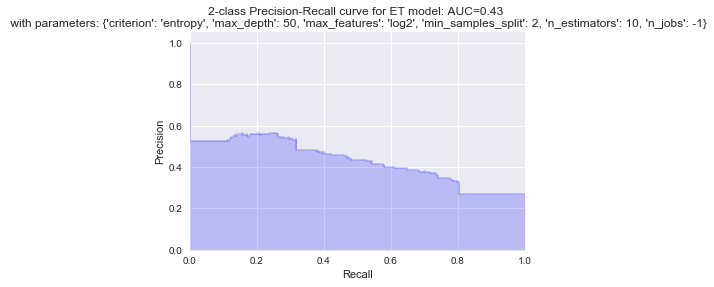

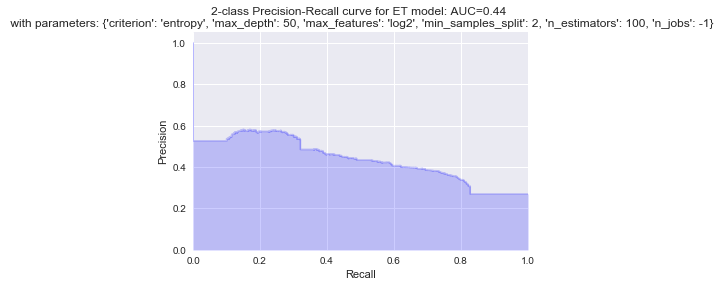

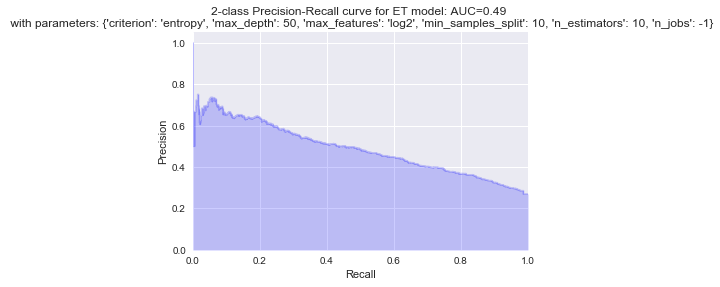

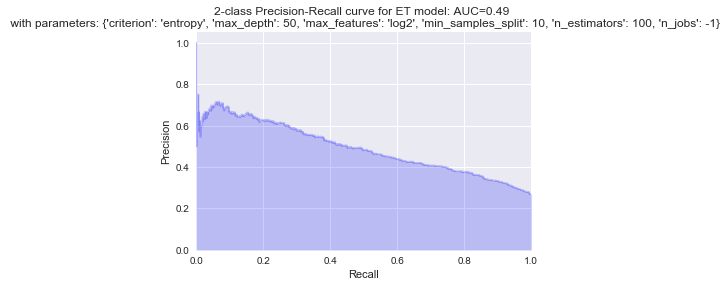

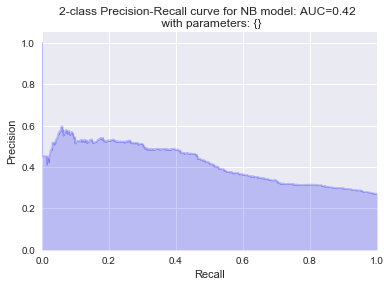

In [62]:
results2 = clf_loop(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"], x_train, x_test, y_train2, y_test2)

In [63]:
from IPython.display import display
display(results2)

model_type                                         parameters  auc-roc  \
0           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   0.7342   
1           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   0.7452   
2           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   0.7304   
3           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   0.7439   
4           RF  {'max_depth': 5, 'max_features': 'log2', 'min_...   0.7079   
5           RF  {'max_depth': 5, 'max_features': 'log2', 'min_...   0.7274   
6           RF  {'max_depth': 5, 'max_features': 'log2', 'min_...   0.7219   
7           RF  {'max_depth': 5, 'max_features': 'log2', 'min_...   0.7386   
8           RF  {'max_depth': 50, 'max_features': 'sqrt', 'min...   0.7033   
9           RF  {'max_depth': 50, 'max_features': 'sqrt', 'min...   0.7078   
10          RF  {'max_depth': 50, 'max_features': 'sqrt', 'min...   0.7176   
11          RF  {'max_depth': 50, 'max_features': 'sqrt', 'min...   0.7329   
12          RF  {'max_depth': 50, 'max_features': 'log2', 'min...   0.6894   
13          RF  {'max_depth': 50, 'max_features': 'log2', 'min...   0.7004   
14          RF  {'max_depth': 50, 'max_features': 'log2', 'min...   0.7144   
15          RF  {'max_depth': 50, 'max_features': 'log2', 'min...   0.7317   
16       Boost          {'algorithm': 'SAMME', 'n_estimators': 1}   0.6214   
17       Boost         {'algorithm': 'SAMME', 'n_estimators': 10}   0.7324   
18       Boost        {'algorithm': 'SAMME', 'n_estimators': 100}   0.7367   
19       Boost       {'algorithm': 'SAMME', 'n_estimators': 1000}   0.7375   
20       Boost        {'algorithm': 'SAMME.R', 'n_estimators': 1}   0.6214   
21       Boost       {'algorithm': 'SAMME.R', 'n_estimators': 10}   0.7367   
22       Boost      {'algorithm': 'SAMME.R', 'n_estimators': 100}   0.7390   
23       Boost     {'algorithm': 'SAMME.R', 'n_estimators': 1000}   0.7382   
24         Bag  {'max_features': 5, 'max_samples': 5, 'n_estim...   0.5161   
25         Bag  {'max_features': 5, 'max_samples': 5, 'n_estim...   0.5550   
26         Bag  {'max_features': 5, 'max_samples': 5, 'n_estim...   0.5745   
27         Bag  {'max_features': 5, 'max_samples': 5, 'n_estim...   0.5421   
28         Bag  {'max_features': 5, 'max_samples': 10, 'n_esti...   0.6214   
29         Bag  {'max_features': 5, 'max_samples': 10, 'n_esti...   0.6325   
..         ...                                                ...      ...   
85          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...   0.7445   
86          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...   0.7362   
87          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...   0.7368   
88          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...   0.7233   
89          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...   0.7354   
90          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...   0.6768   
91          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...   0.6817   
92          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...   0.7133   
93          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...   0.7236   
94          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...   0.6738   
95          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...   0.6776   
96          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...   0.7114   
97          ET  {'criterion': 'gini', 'max_depth': 50, 'max_fe...   0.7231   
98          ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...   0.7364   
99          ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...   0.7408   
100         ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...   0.7356   
101         ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...   0.7437   
102         ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...   0.7250   
103         ET  {'criterion': 'entropy', 'max_depth': 5, 'max_...   0.7336   
104         ET  {'criterio

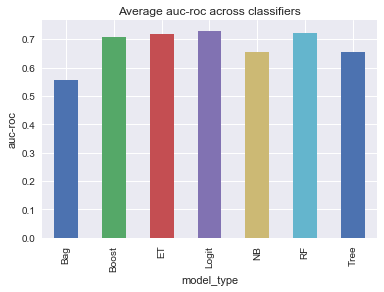

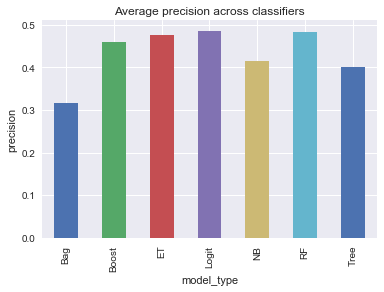

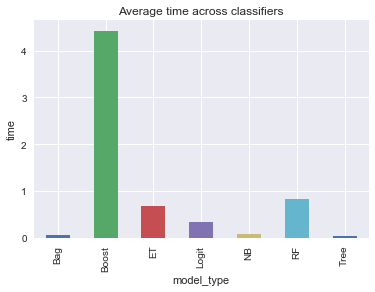

In [65]:
for item in ['auc-roc','precision','time']:
    plt.figure()
    results2.groupby(['model_type'])[item].mean().plot(kind='bar', title='Average '+item+' across classifiers')
    plt.ylabel(item)

In [66]:
models2 =results2.groupby('model_type')['auc-roc'].nlargest(1)

In [67]:
models2

model_type     
Bag         29     0.6325
Boost       22     0.7390
ET          85     0.7445
Logit       44     0.7390
NB          114    0.6541
RF          1      0.7452
Tree        51     0.7176
Name: auc-roc, dtype: float64

In [70]:
rows2 = [29,22,85,44,114,1,51]

In [71]:
results2.loc[rows2].iloc[:,0:6]

model_type                                         parameters  auc-roc  \
29         Bag  {'max_features': 5, 'max_samples': 10, 'n_esti...   0.6325   
22       Boost      {'algorithm': 'SAMME.R', 'n_estimators': 100}   0.7390   
85          ET  {'criterion': 'gini', 'max_depth': 5, 'max_fea...   0.7445   
44       Logit                        {'C': 0.1, 'penalty': 'l1'}   0.7390   
114         NB                                                 {}   0.6541   
1           RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   0.7452   
51        Tree  {'criterion': 'gini', 'max_depth': 5, 'max_fea...   0.7176   

     precision    time  precision,recall,f1 at_5  
29      0.4000  0.0313     (0.5, 0.0927, 0.1564)  
22      0.4927  1.6998    (0.6471, 0.12, 0.2024)  
85      0.5012  0.6208  (0.6176, 0.1145, 0.1932)  
44      0.4976  0.3141  (0.6412, 0.1189, 0.2006)  
114     0.4153  0.0914  (0.5294, 0.0981, 0.1656)  
1       0.5003  0.6644   (0.6235, 0.1156, 0.195)  
51      0.4553  0.0200  (0.6118, 0.1134, 0.1914)

In [72]:
best2 = {}
for row in rows2:
    best2[results2.loc[row]["model_type"]]=results2.loc[row]["parameters"]

In [73]:
for k,arg in best2.items():
    for key,val in arg.items():
        arg[key] = [val]

In [74]:
best2

{'Bag': {'max_features': [5], 'max_samples': [10], 'n_estimators': [10]},
 'Boost': {'algorithm': ['SAMME.R'], 'n_estimators': [100]},
 'ET': {'criterion': ['gini'],
  'max_depth': [5],
  'max_features': ['sqrt'],
  'min_samples_split': [10],
  'n_estimators': [100],
  'n_jobs': [-1]},
 'Logit': {'C': [0.1], 'penalty': ['l1']},
 'NB': {},
 'RF': {'max_depth': [5],
  'max_features': ['sqrt'],
  'min_samples_split': [2],
  'n_estimators': [100]},
 'Tree': {'criterion': ['gini'],
  'max_depth': [5],
  'max_features': ['sqrt'],
  'min_samples_split': [5]}}

In [75]:
results2.loc[55]['parameters']

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 5}

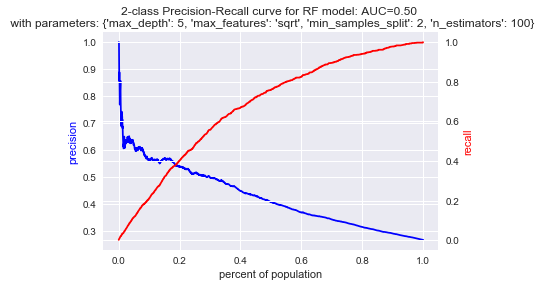

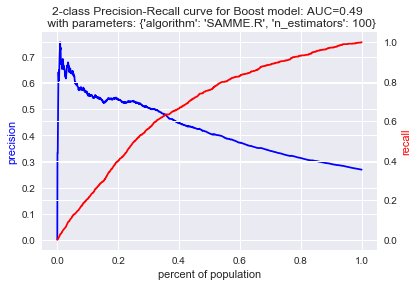

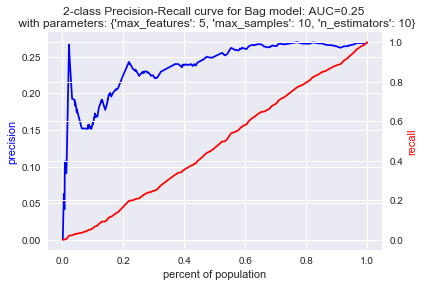

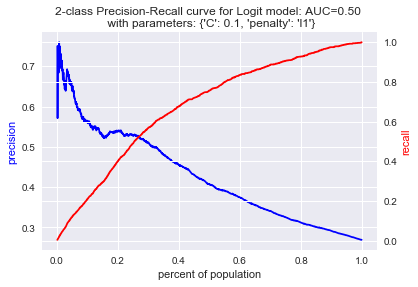

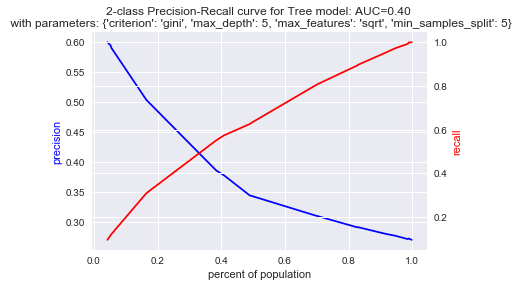

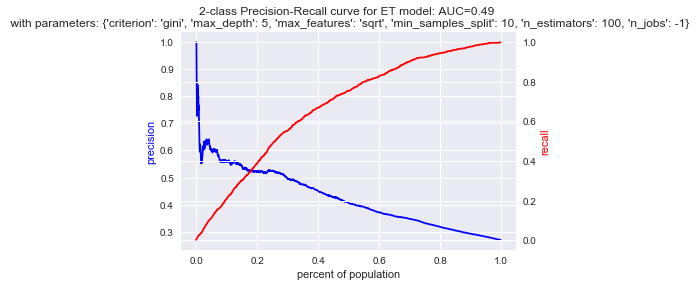

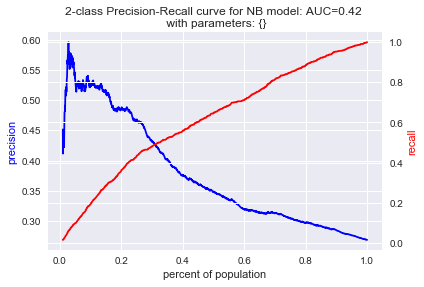

In [76]:
plot_best(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"], x_train, x_test, y_train2, y_test2, best2)

In [ ]:
#Printing out the best decision tree
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features='sqrt', min_samples_split=5)

In [ ]:
tree = dt.fit(x_train, y_train2)

In [ ]:
tree_viz = export_graphviz(tree, out_file=None, feature_names=indepv, rounded=True, filled=True)
graph =graphviz.Source(tree_viz)

In [ ]:
graph

Feature ranking:
1. mh_treatment (0.222556)
2. mar_statS (0.031253)
3. case_typeCR (0.030750)
4. bail_typeSUR (0.028697)
5. bail_amt_binned0 (0.028457)
6. sexFEMALE (0.027846)
7. sexMALE (0.027799)
8. bailed_out (0.027220)
9. arresting_agencyOVERLAND PARK P.D. (0.024865)
10. case_typeDV (0.024674)


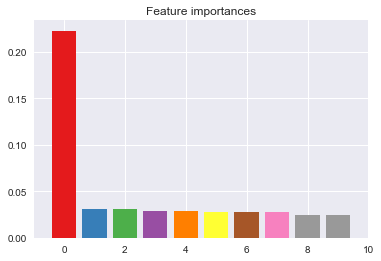

In [77]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(x_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
indices = indices[:10]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)):
    print("%d. %s (%f)" % (f+1, indepv[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], align="center", color=palette(range(len(indices))))
plt.xlim([-1, len(indices)])
plt.show()

Feature ranking:
1. mh_treatment (0.329648)
2. bail_amt_binned0 (0.112130)
3. bailed_out (0.111258)
4. bail_typeSUR (0.082955)
5. bail_typePR (0.037748)
6. case_typeCR (0.037330)
7. case_typeJV (0.034715)
8. case_typeDV (0.029306)
9. mar_statM (0.027306)
10. per_capita_income_binned0 (0.017875)


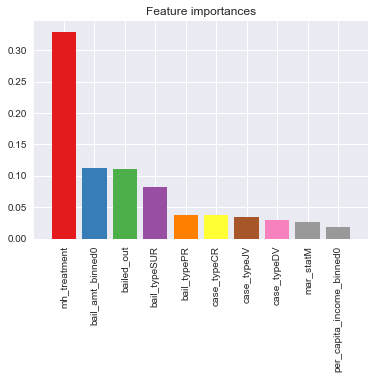

In [123]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=100, max_depth=5, criterion='entropy', min_samples_split=10, n_jobs=-1,
                              random_state=0)

forest.fit(x_train, y_train2)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices = indices[:10]

# Print the feature ranking
print("Feature ranking:")

labels = []
for f in range(len(indices)):
    label = indepv[indices[f]]
    labels.append(label)
    print("%d. %s (%f)" % (f+1, label, importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], align="center", tick_label = labels_arr, color=palette(range(len(indices))))
plt.xlim([-1, len(indices)])
plt.xticks(range(len(indices)),labels, rotation = 'vertical')
plt.show()

In [155]:
def plot_mult(models, x_train, x_test, y_train, y_test, bestm = best):
    '''
    Run model with the best given params on x and y
    and print out the scores for comparison
    '''
    colors = "bgrcmykw"
    color_index = 0

    fig, ax1 = plt.subplots()
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax2 = ax1.twinx()
    ax2.set_ylabel('recall', color='r')
    for index, clf in enumerate([clfs[x] for x in models]):
        model_params = bestm[models[index]]
        for p in ParameterGrid(model_params):
            try:
                clf.set_params(**p)
                y_pred_probs = clf.fit(x_train, y_train).predict_proba(x_test)[:,1]
                
                precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_test, y_pred_probs)
                precision_curve = precision_curve[:-1]
                recall_curve = recall_curve[:-1]
                pct_above_per_thresh = []
                number_scored = len(y_pred_probs)
                for value in pr_thresholds:
                    num_above_thresh = len(y_pred_probs[y_pred_probs>=value])
                    pct_above_thresh = num_above_thresh / float(number_scored)
                    pct_above_per_thresh.append(pct_above_thresh)
                pct_above_per_thresh = np.array(pct_above_per_thresh)
                
                ax1.plot(pct_above_per_thresh, precision_curve, c=colors[color_index])
                ax2.plot(pct_above_per_thresh, recall_curve, c=colors[color_index])                
            except IndexError as e:
                print(e)
                continue
        color_index += 1
        if color_index >= 7:
            color_index = 0
    ax1.legend(models)
    plt.show()

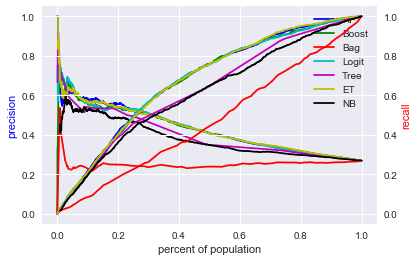

In [157]:
plot_mult(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"], x_train, x_test, y_train2, y_test2, best2)